In [1]:
%matplotlib notebook
from EIANN import *
from EIANN_utils import *
import matplotlib.pyplot as plt
from nested.utils import read_from_yaml, write_to_yaml

In [2]:
input_size = 21
dataset = torch.eye(input_size)
target = torch.eye(dataset.shape[0])

epochs=300
seed=42

Backprop w/static inhibition (softplus; Adam)

In [ ]:
layer_config = {'Input': 
                    {'E': 
                         {'size': 21}
                    },
                'H1': 
                    {'E': 
                       {'size': 7, 
                        'activation': 'softplus', 
                        'activation_kwargs': 
                            {'beta': 4.}
                       },
                    'FBI': 
                        {'size': 1, 
                        'activation': 'softplus', 
                        'activation_kwargs': 
                            {'beta': 4.}
                        }
                    },
                'Output': 
                    {'E': 
                       {'size': 21, 
                        'activation': 'softplus', 
                        'activation_kwargs': 
                            {'beta': 4.}
                       },
                    'FBI': 
                        {'size': 1, 
                        'activation': 'softplus', 
                        'activation_kwargs': 
                            {'beta': 4.}
                        }
                    }
                 }

projection_config = {'H1':
                         {'E': 
                              {'Input': 
                                   {'E': 
                                        {'weight_bounds': (0, None), 
                                         'direction': 'F', 
                                         'learning_rule': 'Backprop'
                                        }
                                   }, 
                               'H1': 
                                   {'FBI': 
                                        {'weight_init': 'fill_',
                                         'weight_init_args': (-1.,), 
                                         'direction': 'R', 
                                         'learning_rule': None
                                        }
                                   }
                              },
                          'FBI': 
                              {'H1': 
                                   {'E': 
                                        {'weight_init': 'fill_',
                                         'weight_init_args': (1.,), 
                                         'direction': 'F', 
                                         'learning_rule': None
                                        }
                                   }
                              }
                         },
                     'Output': 
                         {'E': 
                              {'H1': 
                                   {'E': 
                                        {'weight_bounds': (0, None), 
                                         'direction': 'F', 
                                         'learning_rule': 'Backprop'
                                        }
                                   }, 
                               'Output': 
                                   {'FBI': 
                                        {'weight_init': 'fill_',
                                         'weight_init_args': (-1.,), 
                                         'direction': 'R', 
                                         'learning_rule': None
                                        }
                                   }
                              },
                          'FBI': 
                              {'Output': 
                                   {'E': 
                                        {'weight_init': 'fill_',
                                         'weight_init_args': (1.,), 
                                         'direction': 'F', 
                                         'learning_rule': None
                                        }
                                   }
                              }
                         }
                    }

hyperparameter_kwargs = {'tau': 3,
                         'forward_steps': 10,
                         'backward_steps': 2,
                         'learning_rate': 0.01,
                         'seed': 42,
                         'verbose': True
                        }

network = EIANN(layer_config, projection_config, **hyperparameter_kwargs, optimizer=Adam)
test_EIANN_config(network, dataset, target, epochs)

Backprop w/static inhibition (relu; Adam)

In [ ]:
layer_config = {'Input': 
                    {'E': 
                         {'size': 21}
                    },
                'H1': 
                    {'E': 
                       {'size': 7, 
                        'activation': 'relu'
                       },
                    'FBI': 
                        {'size': 1, 
                        'activation': 'relu'
                        }
                    },
                'Output': 
                    {'E': 
                       {'size': 21, 
                        'activation': 'relu'
                       },
                    'FBI': 
                        {'size': 1, 
                        'activation': 'relu'
                        }
                    }
                 }

projection_config = {'H1':
                         {'E': 
                              {'Input': 
                                   {'E': 
                                        {'weight_bounds': (0, None), 
                                         'direction': 'F', 
                                         'learning_rule': 'Backprop'
                                        }
                                   }, 
                               'H1': 
                                   {'FBI': 
                                        {'weight_init': 'fill_',
                                         'weight_init_args': (-1.,), 
                                         'direction': 'R', 
                                         'learning_rule': None
                                        }
                                   }
                              },
                          'FBI': 
                              {'H1': 
                                   {'E': 
                                        {'weight_init': 'fill_',
                                         'weight_init_args': (1.,), 
                                         'direction': 'F', 
                                         'learning_rule': None
                                        }
                                   }
                              }
                         },
                     'Output': 
                         {'E': 
                              {'H1': 
                                   {'E': 
                                        {'weight_bounds': (0, None), 
                                         'direction': 'F', 
                                         'learning_rule': 'Backprop'
                                        }
                                   }, 
                               'Output': 
                                   {'FBI': 
                                        {'weight_init': 'fill_',
                                         'weight_init_args': (-1.,), 
                                         'direction': 'R', 
                                         'learning_rule': None
                                        }
                                   }
                              },
                          'FBI': 
                              {'Output': 
                                   {'E': 
                                        {'weight_init': 'fill_',
                                         'weight_init_args': (1.,), 
                                         'direction': 'F', 
                                         'learning_rule': None
                                        }
                                   }
                              }
                         }
                    }

hyperparameter_kwargs = {'tau': 3,
                         'forward_steps': 10,
                         'backward_steps': 2,
                         'learning_rate': 0.01,
                         'seed': 42,
                         'verbose': False
                        }

network = EIANN(layer_config, projection_config, **hyperparameter_kwargs, optimizer=Adam)
test_EIANN_config(network, dataset, target, epochs)

Backprop w/learned inhibition (softplus; Adam)

In [ ]:
layer_config = {'Input': 
                    {'E': 
                         {'size': 21}
                    },
                'H1': 
                    {'E': 
                       {'size': 7, 
                        'activation': 'softplus', 
                        'activation_kwargs': 
                            {'beta': 4.}
                       },
                    'FBI': 
                        {'size': 7, 
                        'activation': 'softplus', 
                        'activation_kwargs': 
                            {'beta': 4.}
                        }
                    },
                'Output': 
                    {'E': 
                       {'size': 21, 
                        'activation': 'softplus', 
                        'activation_kwargs': 
                            {'beta': 4.}
                       },
                    'FBI': 
                        {'size': 7, 
                        'activation': 'softplus', 
                        'activation_kwargs': 
                            {'beta': 4.}
                        }
                    }
                 }

projection_config = {'H1':
                         {'E': 
                              {'Input': 
                                   {'E': 
                                        {'weight_bounds': (0, None), 
                                         'direction': 'F', 
                                         'learning_rule': 'Backprop'
                                        }
                                   }, 
                               'H1': 
                                   {'FBI': 
                                        {'weight_bounds': (None, 0), 
                                         'direction': 'R', 
                                         'learning_rule': 'Backprop'
                                        }
                                   }
                              },
                          'FBI': 
                              {'H1': 
                                   {'E': 
                                        {'weight_init': 'fill_',
                                         'weight_init_args': (1.,), 
                                         'direction': 'F', 
                                         'learning_rule': None
                                        }
                                   }
                              }
                         },
                     'Output': 
                         {'E': 
                              {'H1': 
                                   {'E': 
                                        {'weight_bounds': (0, None), 
                                         'direction': 'F', 
                                         'learning_rule': 'Backprop'
                                        }
                                   }, 
                               'Output': 
                                   {'FBI': 
                                        {'weight_bounds': (None, 0), 
                                         'direction': 'R', 
                                         'learning_rule': 'Backprop'
                                        }
                                   }
                              },
                          'FBI': 
                              {'Output': 
                                   {'E': 
                                        {'weight_init': 'fill_',
                                         'weight_init_args': (1.,), 
                                         'direction': 'F', 
                                         'learning_rule': None
                                        }
                                   }
                              }
                         }
                    }

hyperparameter_kwargs = {'tau': 3,
                         'forward_steps': 10,
                         'backward_steps': 2,
                         'learning_rate': 0.01,
                         'seed': 42,
                         'verbose': False
                        }

network = EIANN(layer_config, projection_config, **hyperparameter_kwargs, optimizer=Adam)
test_EIANN_config(network, dataset, target, epochs)

Gjorgieva Hebb Norm rule w/static inhibition (relu)

In [ ]:
layer_config = {'Input': 
                    {'E': 
                         {'size': 21}
                    },
                'H1': 
                    {'E': 
                       {'size': 7, 
                        'activation': 'relu'
                       },
                    'FBI': 
                        {'size': 1, 
                        'activation': 'relu'
                        }
                    },
                'Output': 
                    {'E': 
                       {'size': 21, 
                        'activation': 'relu'
                       },
                    'FBI': 
                        {'size': 1, 
                        'activation': 'relu'
                        }
                    }
                 }

projection_config = {'H1':
                         {'E': 
                              {'Input': 
                                   {'E': 
                                        {'weight_init': 'uniform_', 
                                         'weight_init_args': (0, 1), 
                                         'weight_constraint': 'normalize_weight',
                                         'weight_constraint_kwargs': 
                                             {'scale': 5.997826E+00
                                             },
                                         'weight_bounds': (0, None), 
                                         'direction': 'F', 
                                         'learning_rule': 'GjorgievaHebb',
                                         'learning_rule_kwargs': 
                                             {'sign': 1
                                             }
                                        }
                                   }, 
                               'H1': 
                                   {'FBI': 
                                        {'weight_init': 'fill_', 
                                         'weight_init_args': (-9.877346E-01,), 
                                         'direction': 'R', 
                                         'learning_rule': None
                                        }
                                   }
                              },
                          'FBI': 
                              {'H1': 
                                   {'E': 
                                        {'weight_init': 'fill_',
                                         'weight_init_args': (1.,), 
                                         'direction': 'F', 
                                         'learning_rule': None
                                        }
                                   }
                              }
                         },
                      'Output': 
                         {'E': 
                              {'H1': 
                                   {'E': 
                                        {'weight_init': 'uniform_', 
                                         'weight_init_args': (0, 1), 
                                         'weight_constraint': 'normalize_weight',
                                         'weight_constraint_kwargs': 
                                             {'scale': 4.849485E-01
                                             },
                                         'weight_bounds': (0, None), 
                                         'direction': 'F', 
                                         'learning_rule': 'GjorgievaHebb',
                                         'learning_rule_kwargs': 
                                             {'sign': 1
                                             }
                                        }
                                   }, 
                               'Output': 
                                   {'FBI': 
                                        {'weight_init': 'fill_', 
                                         'weight_init_args': (-1.850915E-01,), 
                                         'direction': 'R', 
                                         'learning_rule': None
                                        }
                                   }
                              },
                          'FBI': 
                              {'Output': 
                                   {'E': 
                                        {'weight_init': 'fill_', 
                                         'weight_init_args': (1,), 
                                         'direction': 'F', 
                                         'learning_rule': None
                                        }
                                   }
                              }
                         }
                    }

hyperparameter_kwargs = {'tau': 3,
                         'forward_steps': 10,
                         'backward_steps': 0,
                         'learning_rate': 9.553728E-01,
                         'seed': 42
                        }

network = EIANN(layer_config, projection_config, **hyperparameter_kwargs)
test_EIANN_config(network, dataset, target, epochs, supervised=False)

Gjorgieva Hebb Norm rule w/learned inhibition (Gjorgieva Hebb Norm rule) (relu)

<IPython.core.display.Javascript object>


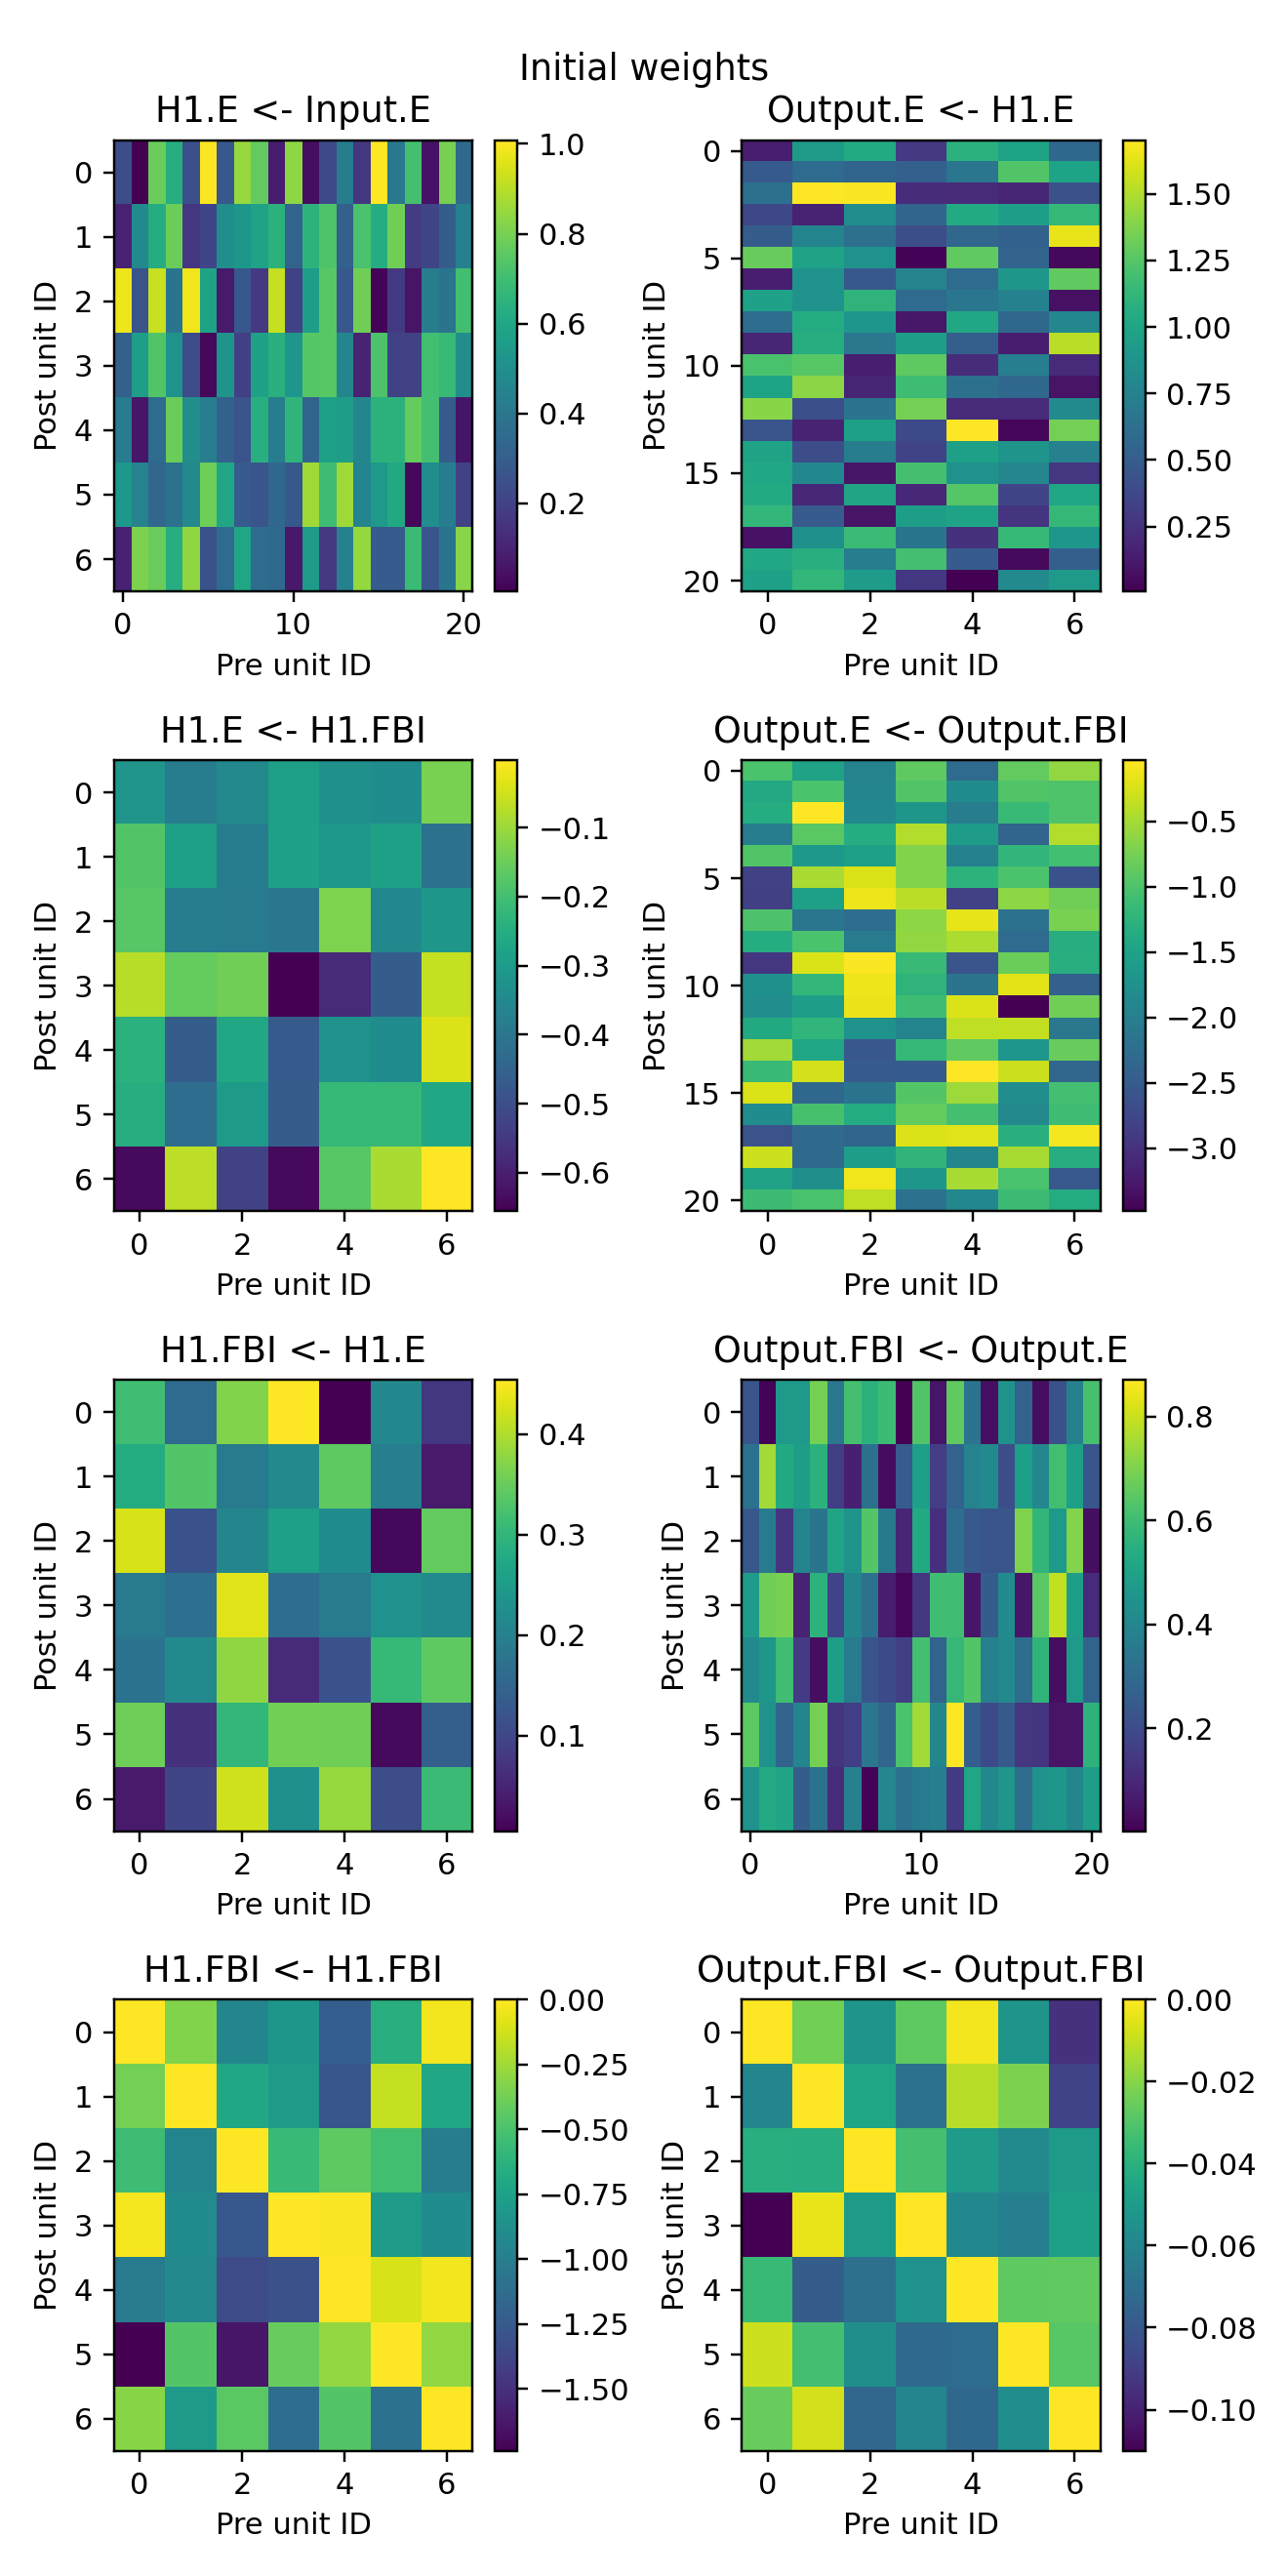

<IPython.core.display.Javascript object>


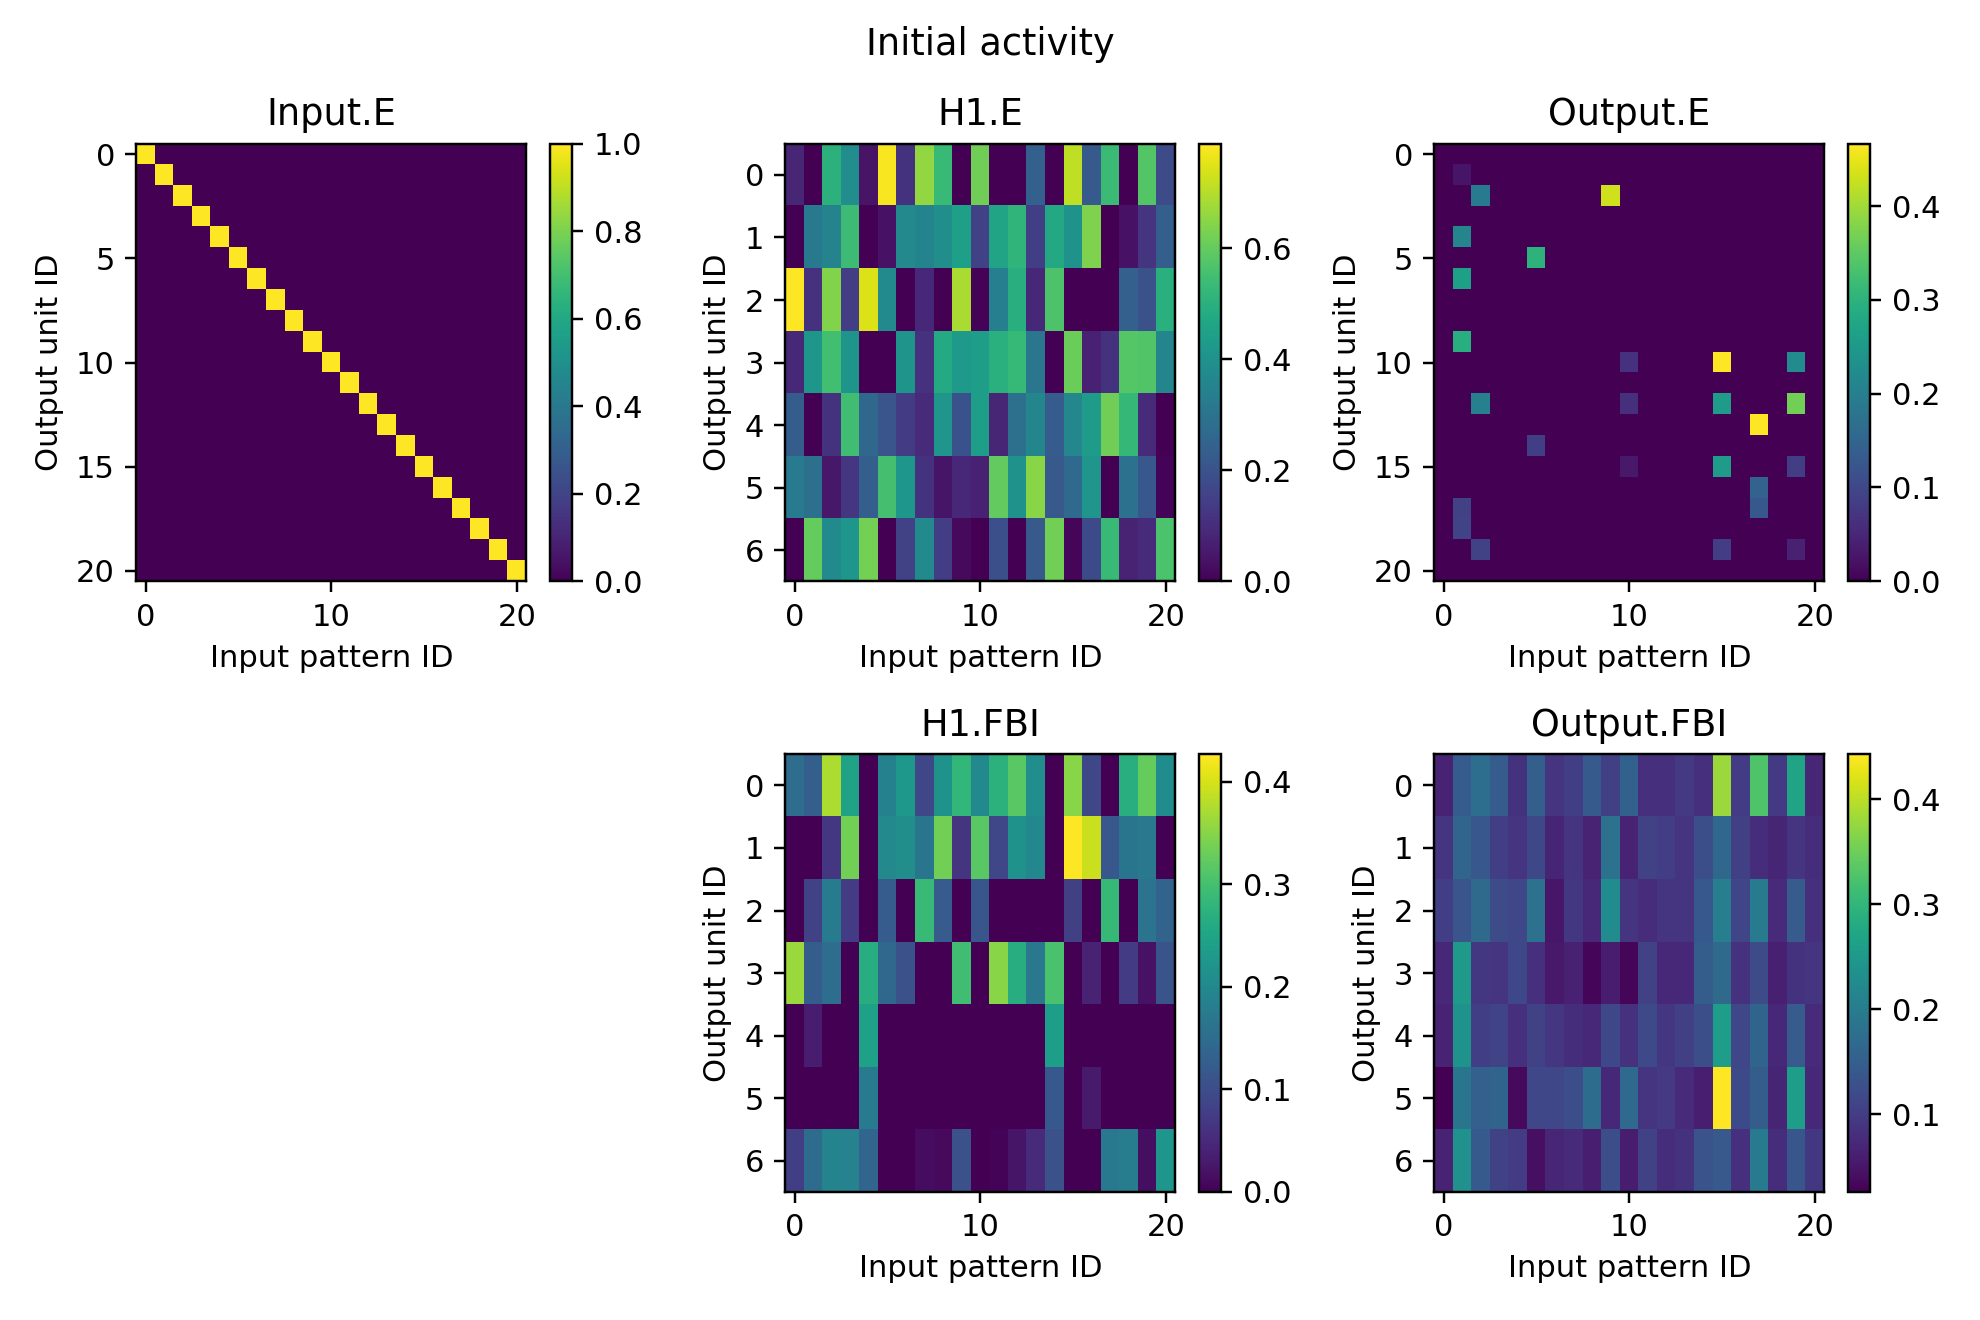

<IPython.core.display.Javascript object>


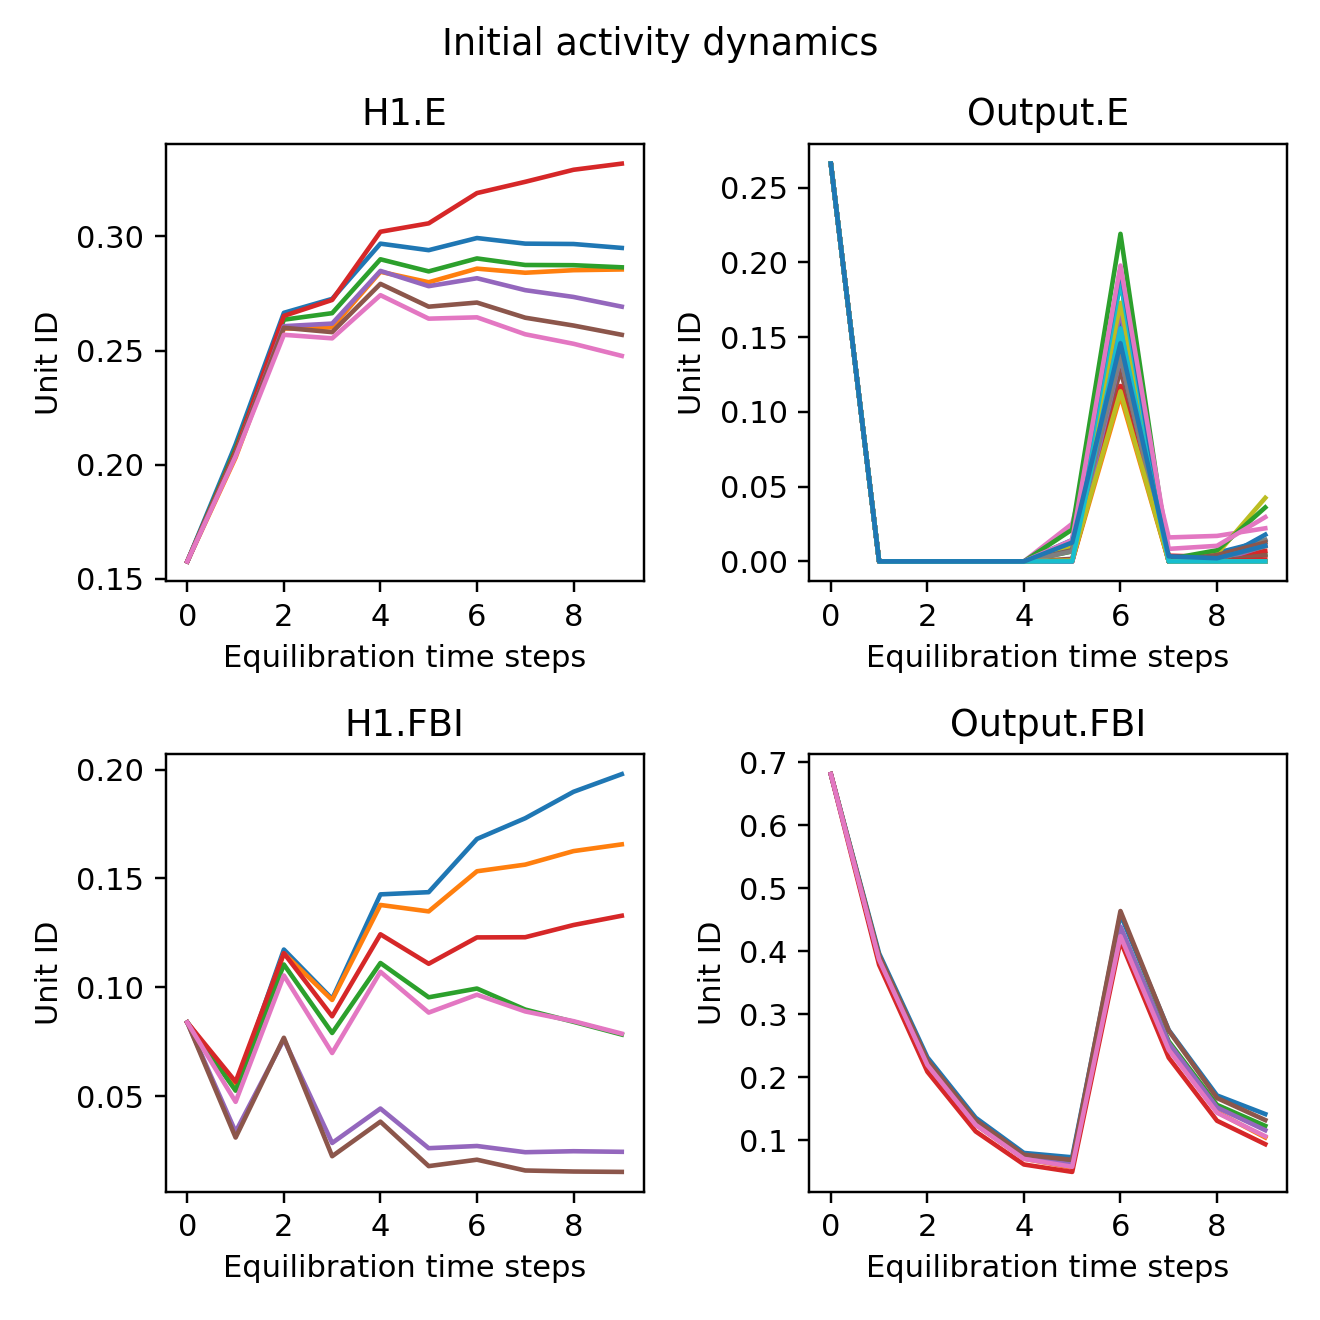

Initial population biases:
H1 E tensor([0., 0., 0., 0., 0., 0., 0.])
H1 FBI tensor([0., 0., 0., 0., 0., 0., 0.])
Output E tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])
Output FBI tensor([0., 0., 0., 0., 0., 0., 0.])


100%|██████████| 300/300 [00:15<00:00, 19.65it/s]


<IPython.core.display.Javascript object>


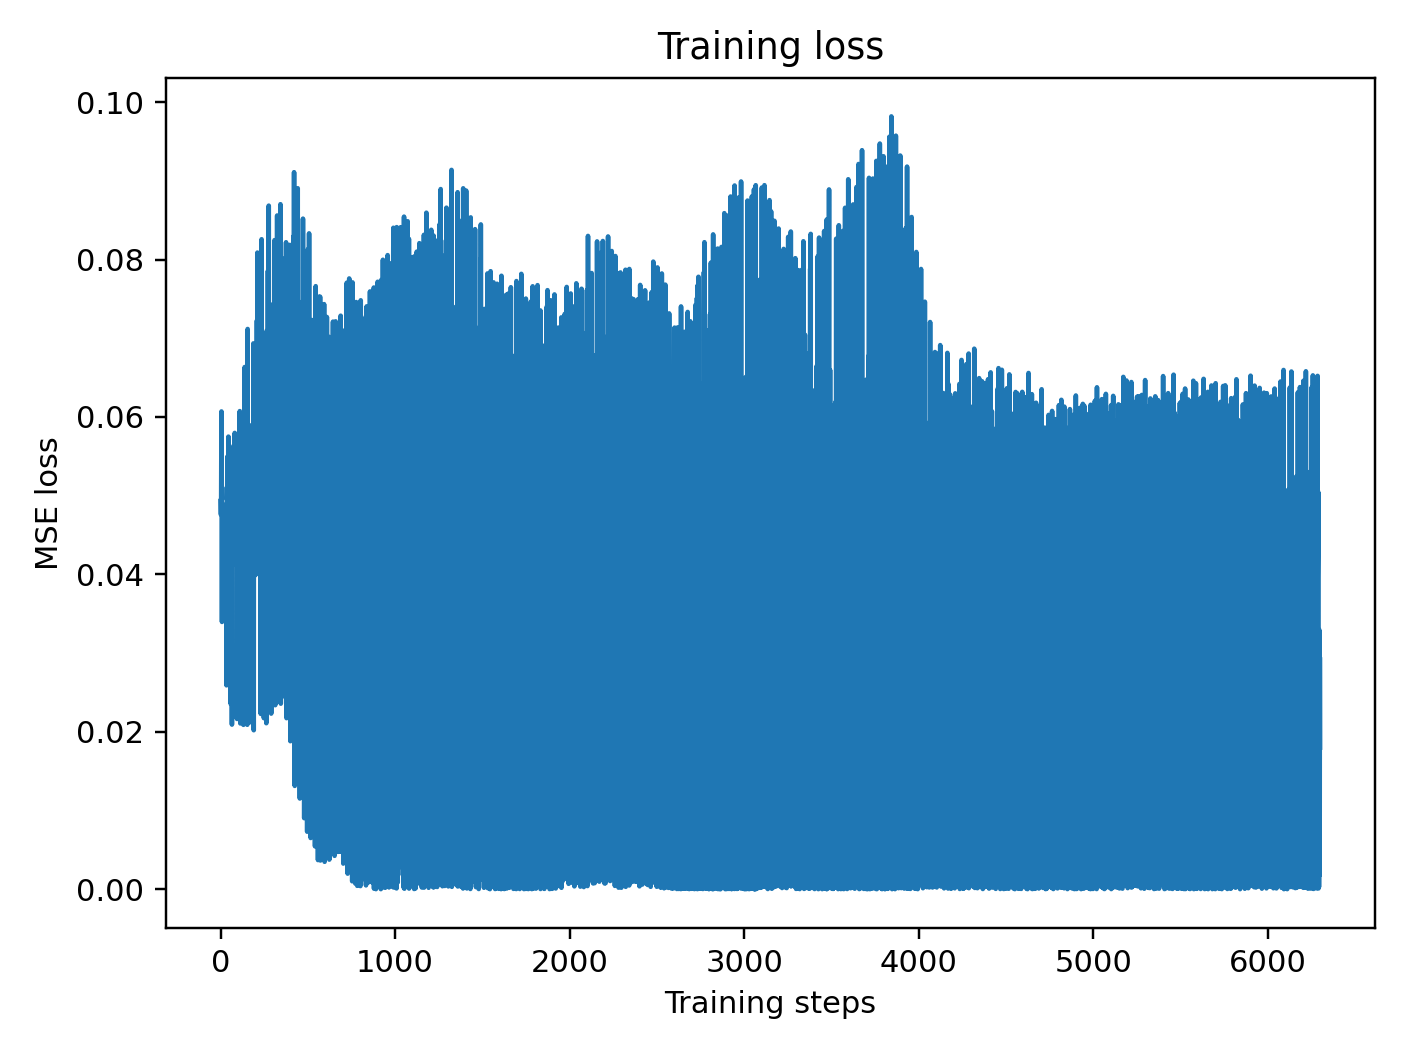

<IPython.core.display.Javascript object>


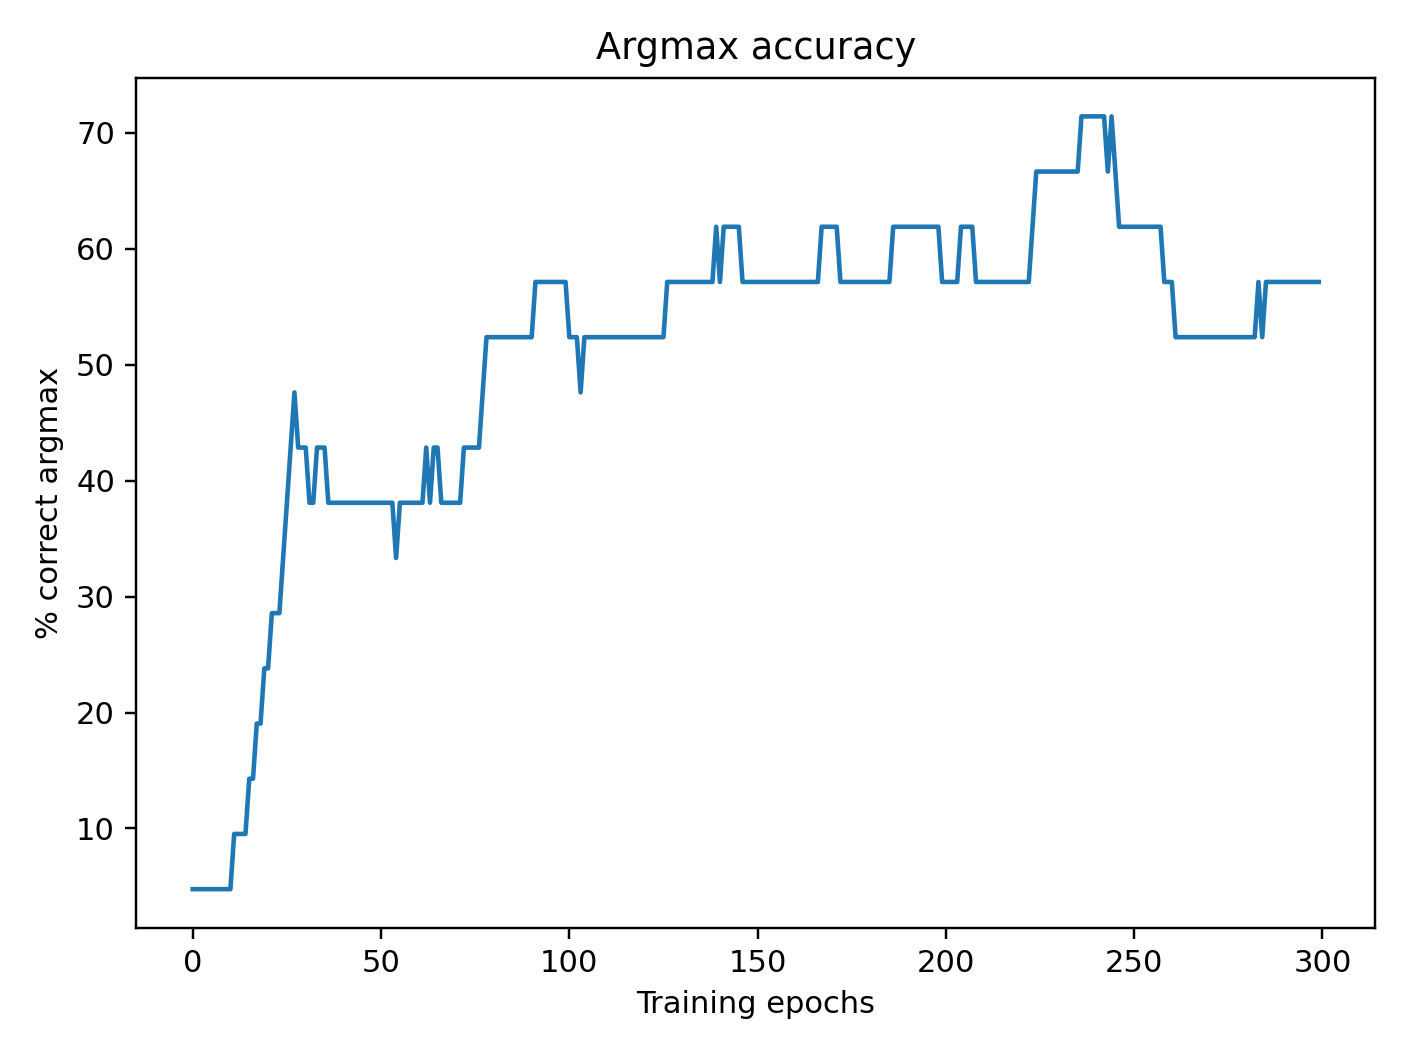

<IPython.core.display.Javascript object>


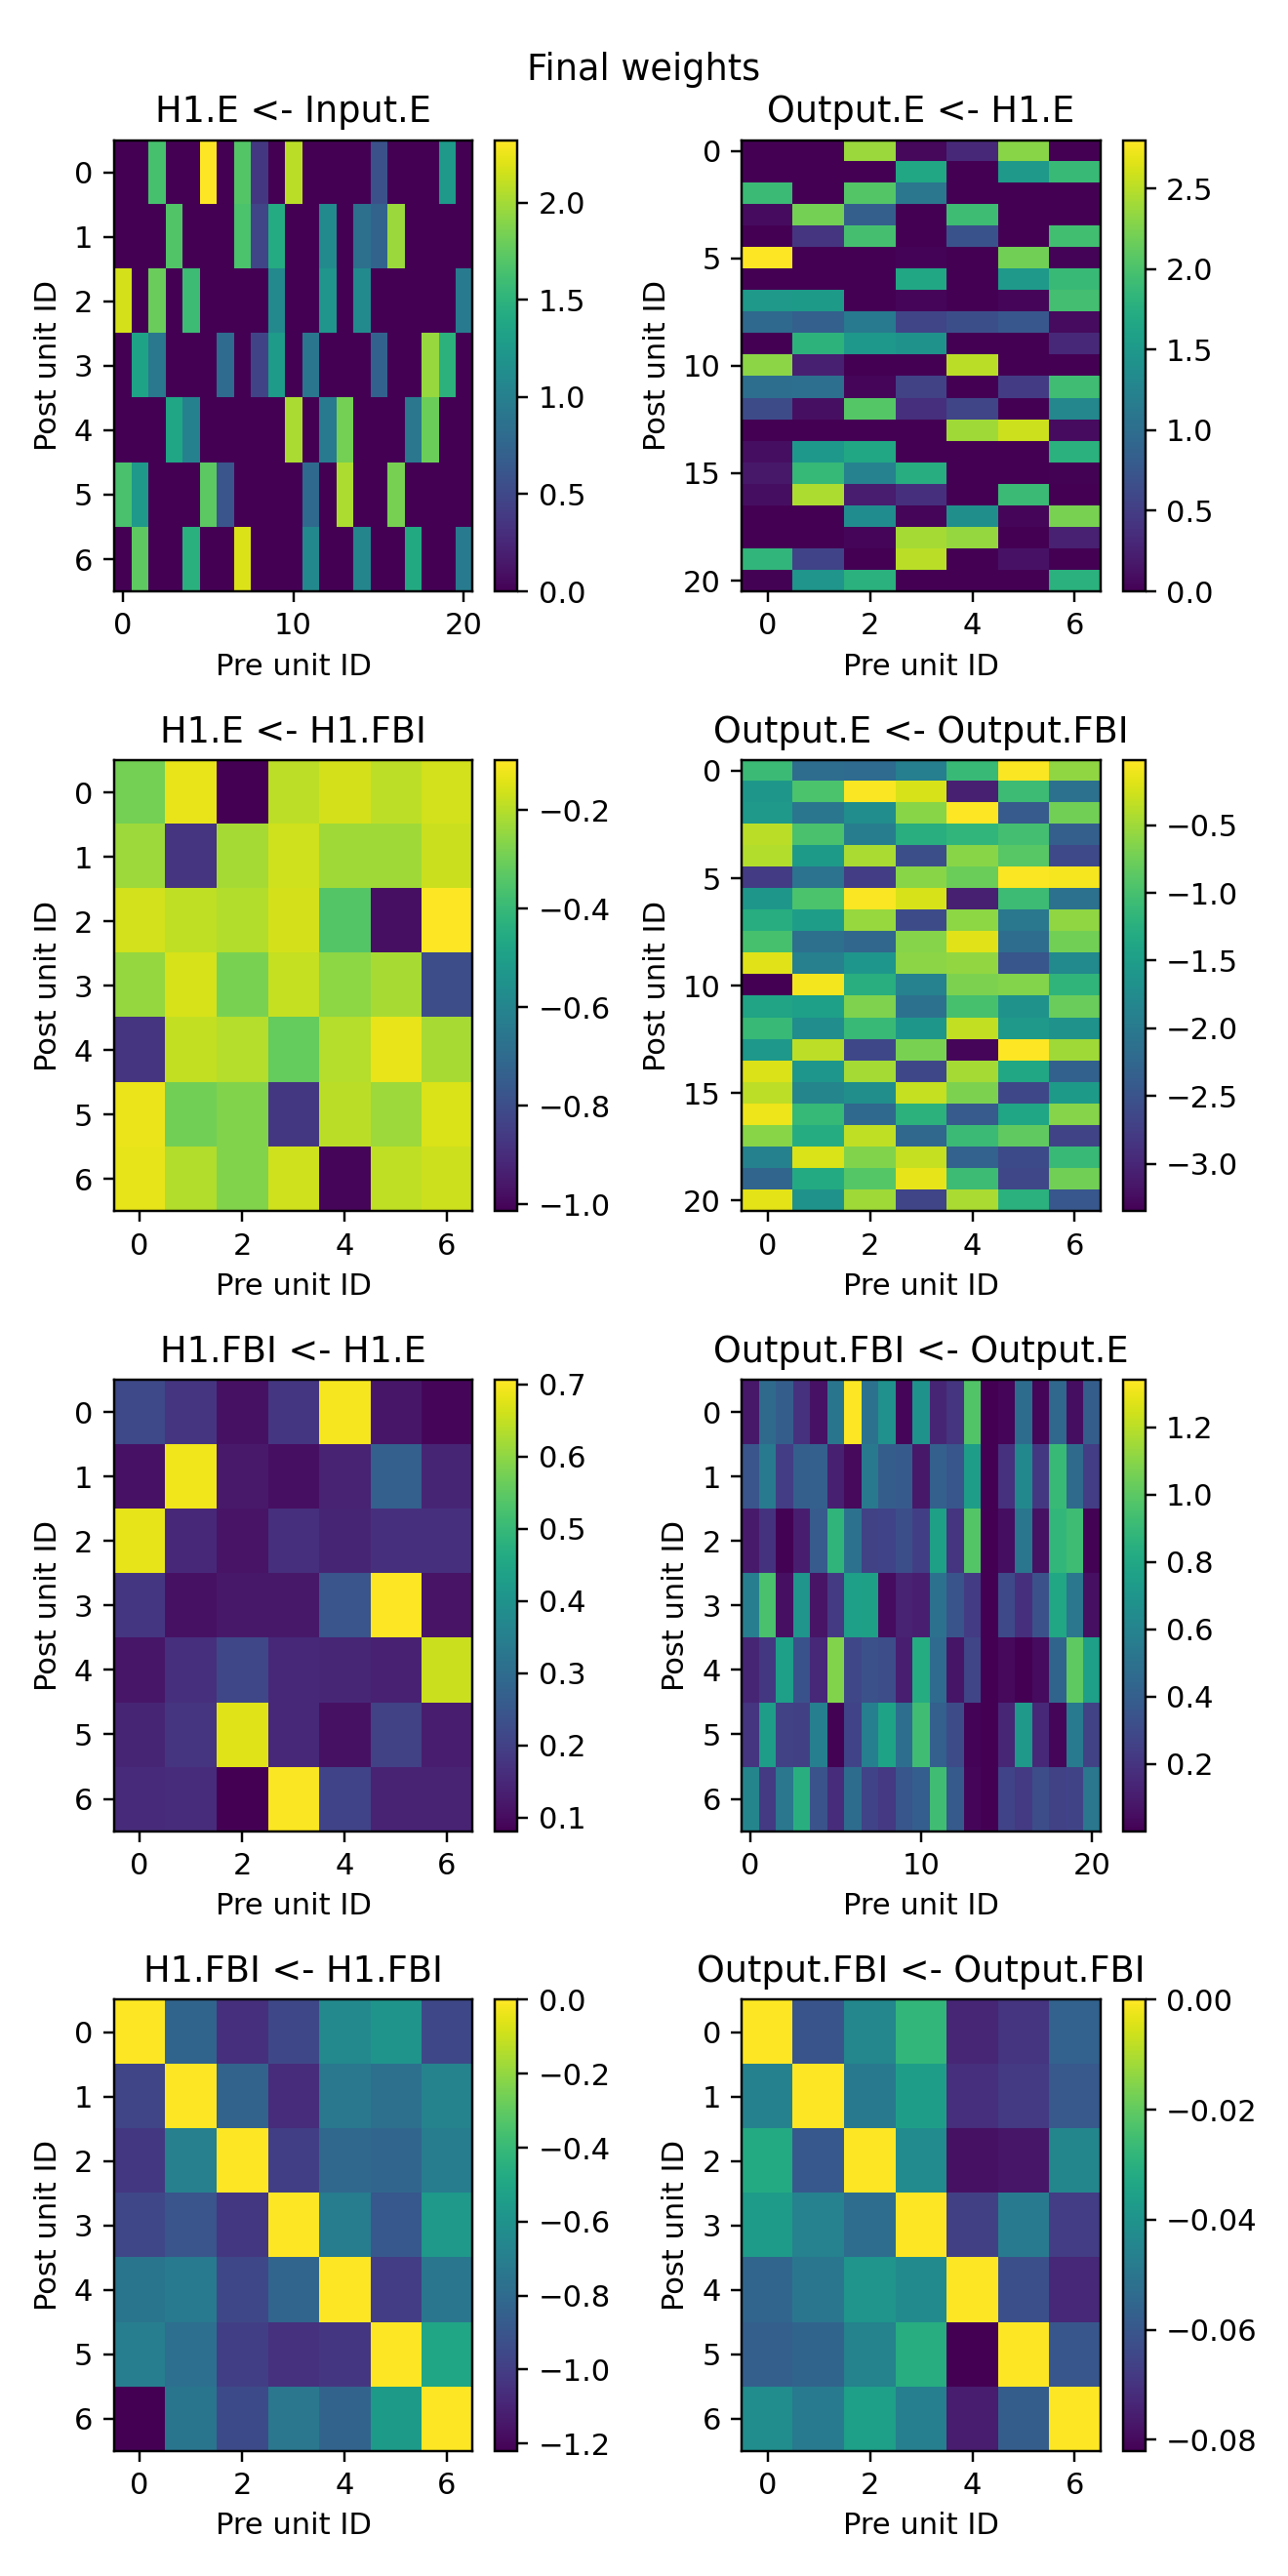

<IPython.core.display.Javascript object>


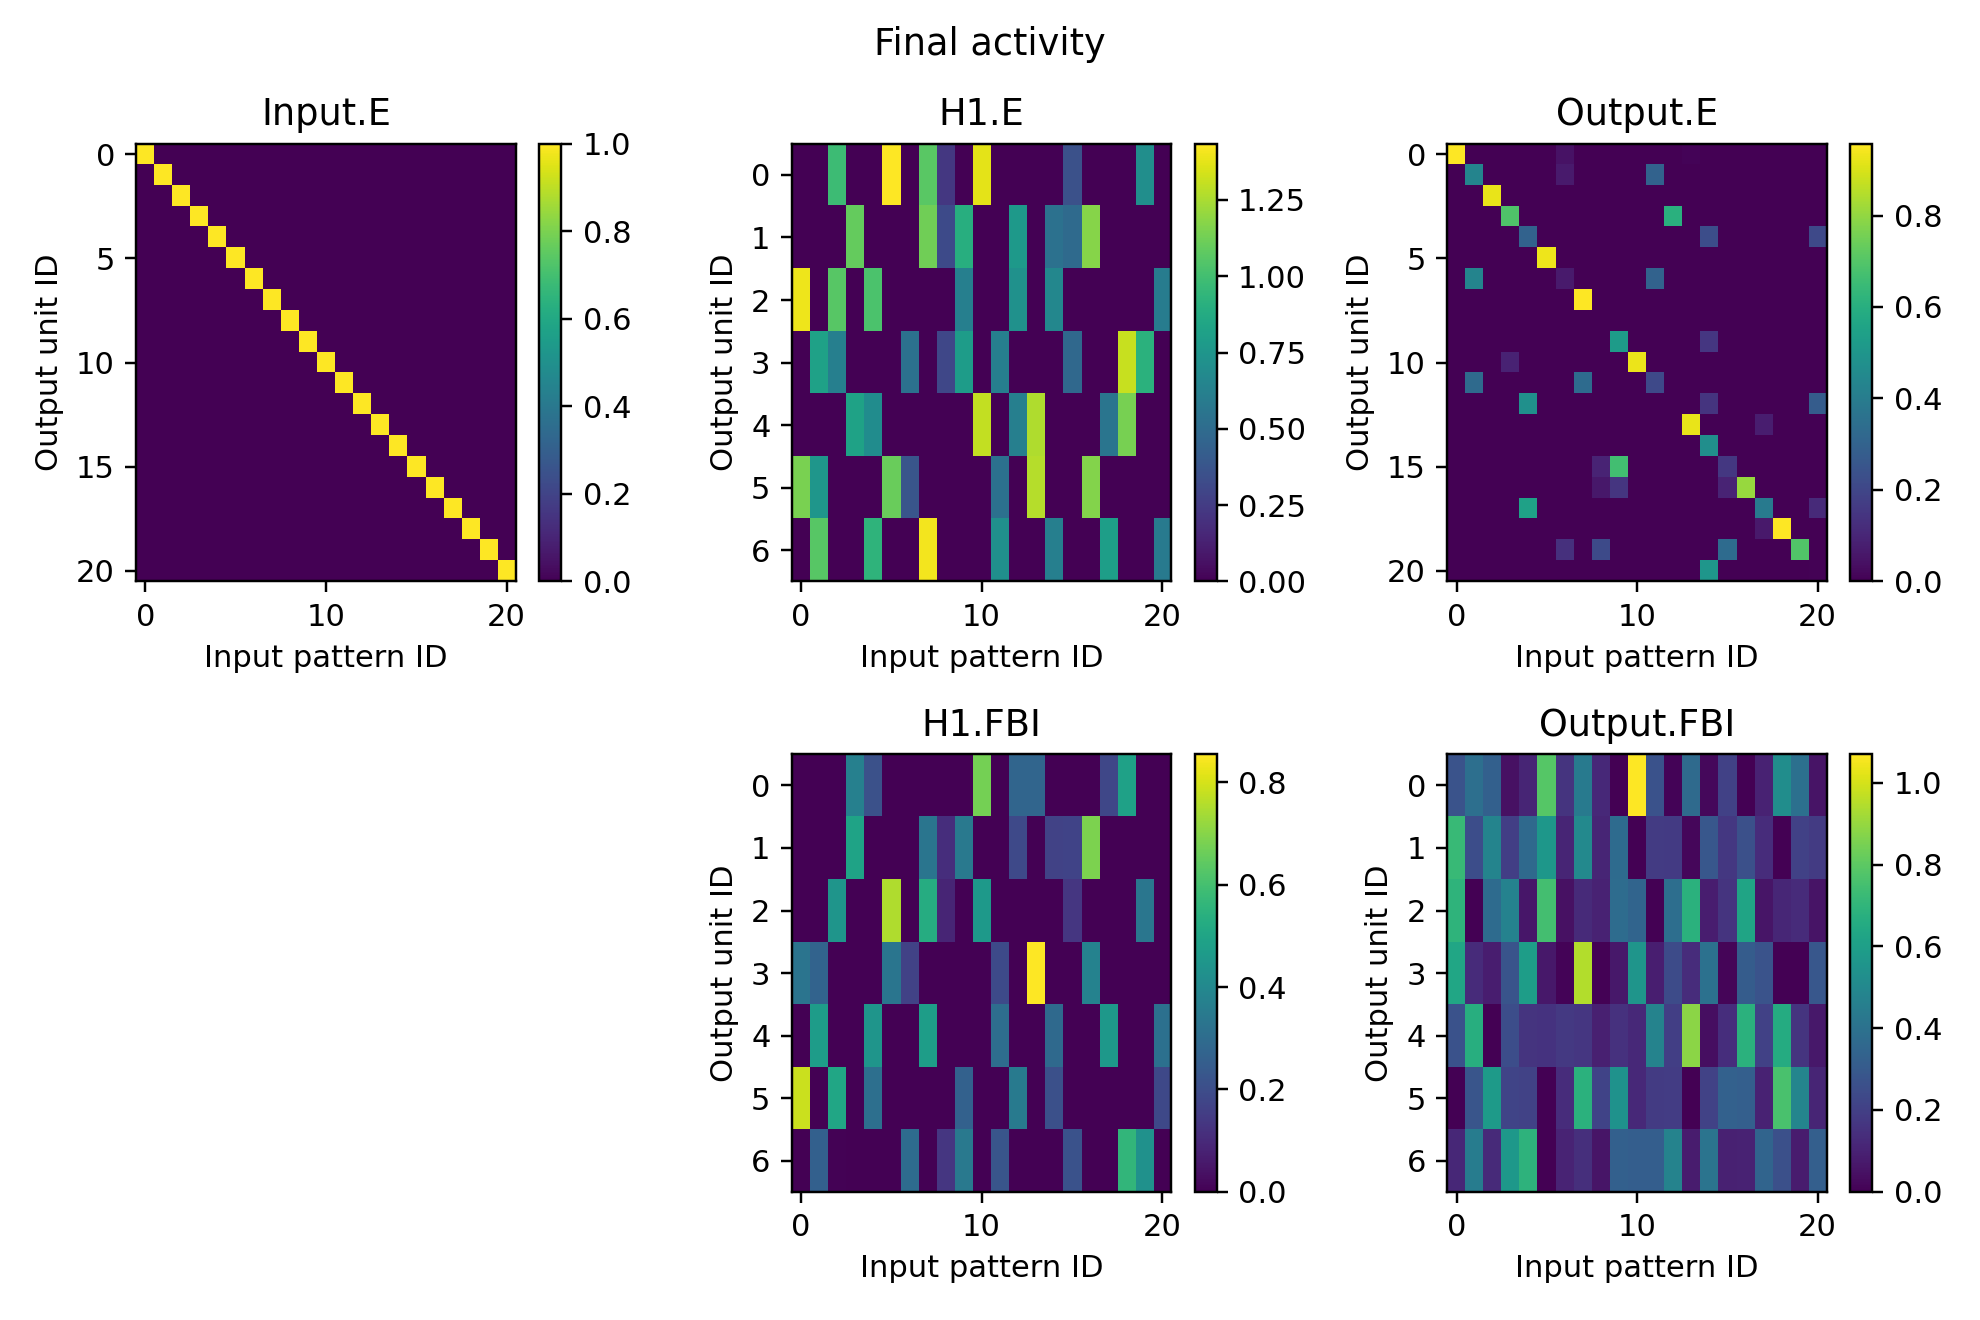

<IPython.core.display.Javascript object>


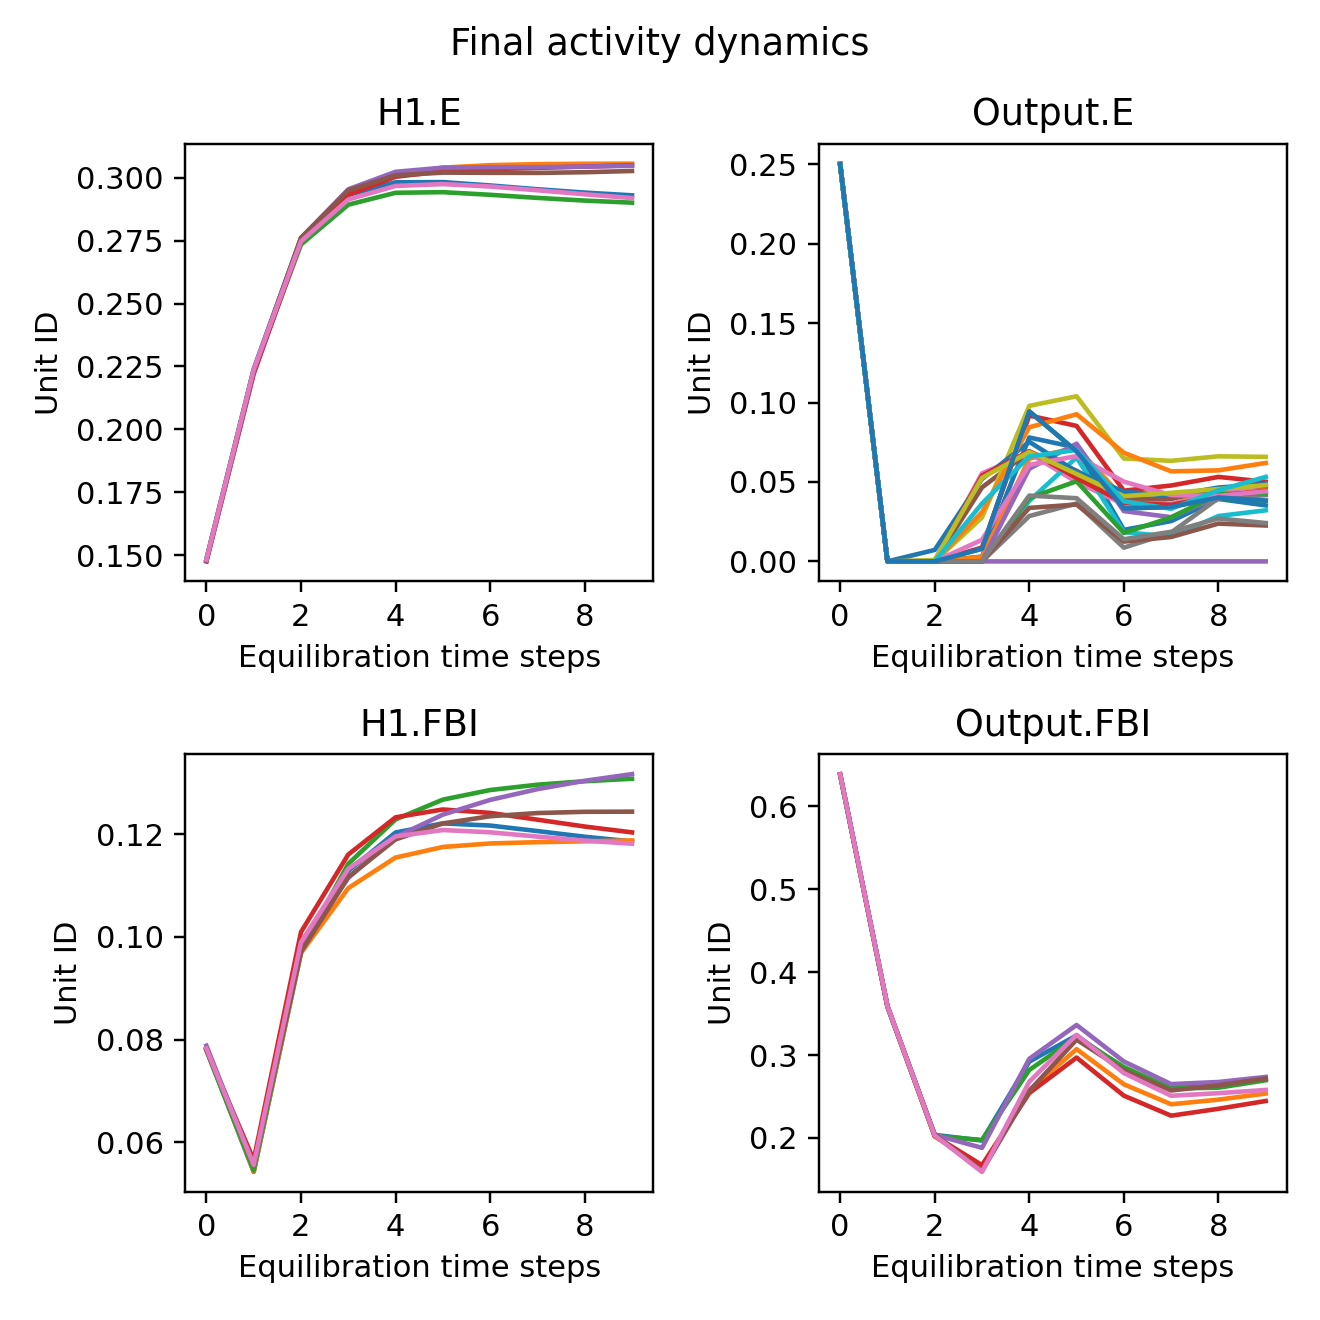

Final population biases:
H1 E tensor([0., 0., 0., 0., 0., 0., 0.])
H1 FBI tensor([0., 0., 0., 0., 0., 0., 0.])
Output E tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])
Output FBI tensor([0., 0., 0., 0., 0., 0., 0.])


In [3]:
layer_config = {'Input': 
                    {'E': 
                         {'size': 21}
                    },
                'H1': 
                    {'E': 
                       {'size': 7, 
                        'activation': 'relu'
                       },
                    'FBI': 
                        {'size': 7, 
                        'activation': 'relu'
                        }
                    },
                'Output': 
                    {'E': 
                       {'size': 21, 
                        'activation': 'relu'
                       },
                    'FBI': 
                        {'size': 7, 
                        'activation': 'relu'
                        }
                    }
                 }

projection_config = {'H1':
                         {'E': 
                              {'Input': 
                                   {'E': 
                                        {'weight_init': 'uniform_', 
                                         'weight_init_args': (0, 1), 
                                         'weight_constraint': 'normalize_weight',
                                         'weight_constraint_kwargs': 
                                             {'scale': 9.927103E+00
                                             },
                                         'weight_bounds': (0, None), 
                                         'direction': 'F', 
                                         'learning_rule': 'GjorgievaHebb',
                                         'learning_rule_kwargs': 
                                             {'sign': 1,
                                              'learning_rate': 2.339308E-01
                                             }
                                        }
                                   }, 
                               'H1': 
                                   {'FBI': 
                                        {'weight_init': 'uniform_', 
                                         'weight_init_args': (-1, 0), 
                                         'weight_constraint': 'normalize_weight',
                                         'weight_constraint_kwargs': 
                                             {'scale': 2.128817E+00
                                             },
                                         'weight_bounds': (None, 0), 
                                         'direction': 'R', 
                                         'learning_rule': 'GjorgievaHebb',
                                         'learning_rule_kwargs': 
                                             {'sign': -1,
                                              'learning_rate': 2.023946E-01
                                             }
                                        }
                                   }
                              },
                          'FBI': 
                              {'H1': 
                                   {'E': 
                                        {'weight_init': 'uniform_', 
                                         'weight_init_args': (0, 1), 
                                         'weight_constraint': 'normalize_weight',
                                         'weight_constraint_kwargs': 
                                             {'scale': 1.597438E+00
                                             },
                                         'weight_bounds': (0, None), 
                                         'direction': 'F', 
                                         'learning_rule': 'GjorgievaHebb',
                                         'learning_rule_kwargs': 
                                             {'sign': 1,
                                              'learning_rate': 5.947580E-02
                                             }
                                        },
                                    'FBI': 
                                        {'weight_init': 'uniform_', 
                                         'weight_init_args': (-1, 0), 
                                         'weight_constraint': 'normalize_weight',
                                         'weight_constraint_kwargs': 
                                             {'scale': 5.040185E+00
                                             },
                                         'weight_bounds': (None, 0), 
                                         'direction': 'R', 
                                         'learning_rule': 'GjorgievaHebb',
                                         'learning_rule_kwargs': 
                                             {'sign': -1,
                                              'learning_rate': 2.982688E-01
                                             }
                                        }
                                   }
                              }
                         },
                      'Output': 
                         {'E': 
                              {'H1': 
                                   {'E': 
                                        {'weight_init': 'uniform_', 
                                         'weight_init_args': (0, 1), 
                                         'weight_constraint': 'normalize_weight',
                                         'weight_constraint_kwargs': 
                                             {'scale': 5.066363E+00
                                             },
                                         'weight_bounds': (0, None), 
                                         'direction': 'F', 
                                         'learning_rule': 'GjorgievaHebb',
                                         'learning_rule_kwargs': 
                                             {'sign': 1,
                                              'learning_rate': 2.339308E-01
                                             }
                                        }
                                   }, 
                               'Output': 
                                   {'FBI': 
                                        {'weight_init': 'uniform_', 
                                         'weight_init_args': (-1, 0), 
                                         'weight_constraint': 'normalize_weight',
                                         'weight_constraint_kwargs': 
                                             {'scale': 9.054215E+00
                                             },
                                         'weight_bounds': (None, 0), 
                                         'direction': 'R', 
                                         'learning_rule': 'GjorgievaHebb',
                                         'learning_rule_kwargs': 
                                             {'sign': -1,
                                              'learning_rate': 2.023946E-01
                                             }
                                        }
                                   }
                              },
                          'FBI': 
                              {'Output': 
                                   {'E': 
                                        {'weight_init': 'uniform_', 
                                         'weight_init_args': (0, 1), 
                                         'weight_constraint': 'normalize_weight',
                                         'weight_constraint_kwargs': 
                                             {'scale': 7.679770E+00
                                             },
                                         'weight_bounds': (0, None), 
                                         'direction': 'F', 
                                         'learning_rule': 'GjorgievaHebb',
                                         'learning_rule_kwargs': 
                                             {'sign': 1,
                                              'learning_rate': 5.947580E-02
                                             }
                                        },
                                    'FBI': 
                                        {'weight_init': 'uniform_', 
                                         'weight_init_args': (-1, 0), 
                                         'weight_constraint': 'normalize_weight',
                                         'weight_constraint_kwargs': 
                                             {'scale': 3.343300E-01
                                             },
                                         'weight_bounds': (None, 0), 
                                         'direction': 'R', 
                                         'learning_rule': 'GjorgievaHebb',
                                         'learning_rule_kwargs': 
                                             {'sign': -1,
                                              'learning_rate': 2.982688E-01
                                             }
                                        }
                                   }
                              }
                         }
                    }

training_kwargs = {'tau': 3,
                     'forward_steps': 10,
                     'backward_steps': 0,
                     'learning_rate': 9.553728E-01
                    }

network = EIANN(layer_config, projection_config, seed=seed, **training_kwargs)
test_EIANN_config(network, dataset, target, epochs, supervised=False)

In [4]:
"""
write_to_yaml('optimize/config/EIANN_1_hidden_Gjorgieva_Hebb_config.yaml',
             {'layer_config': layer_config, 'projection_config': projection_config, 'training_kwargs': training_kwargs}, 
             convert_scalars=True)
"""

<IPython.core.display.Javascript object>


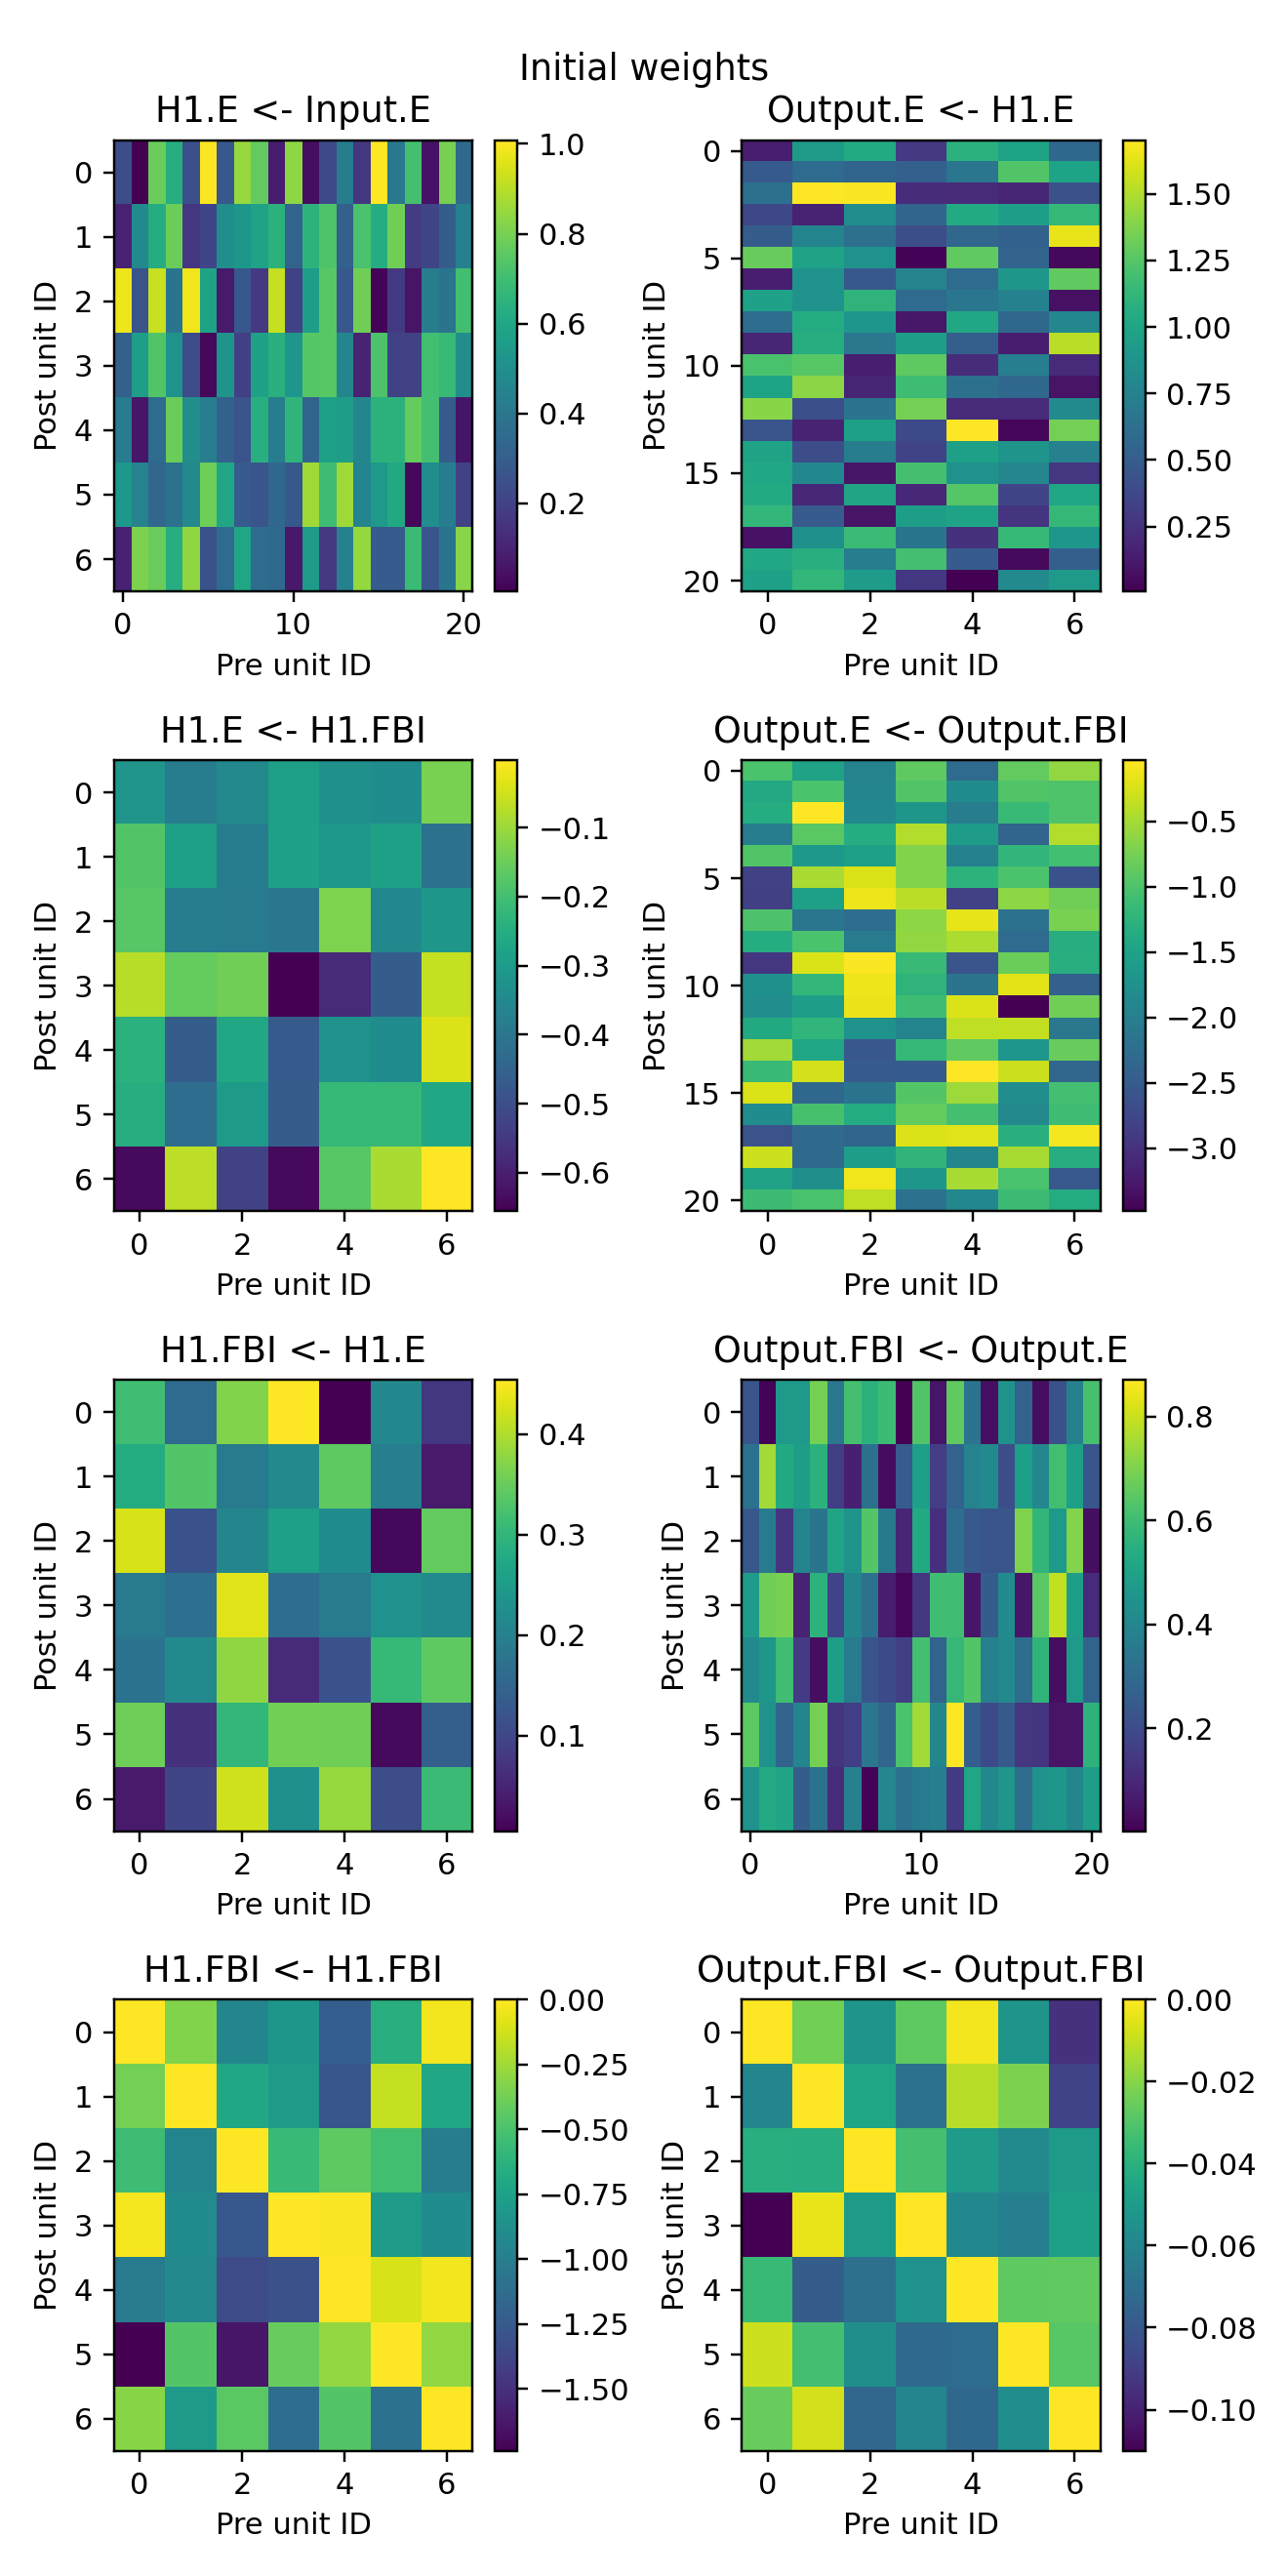

<IPython.core.display.Javascript object>


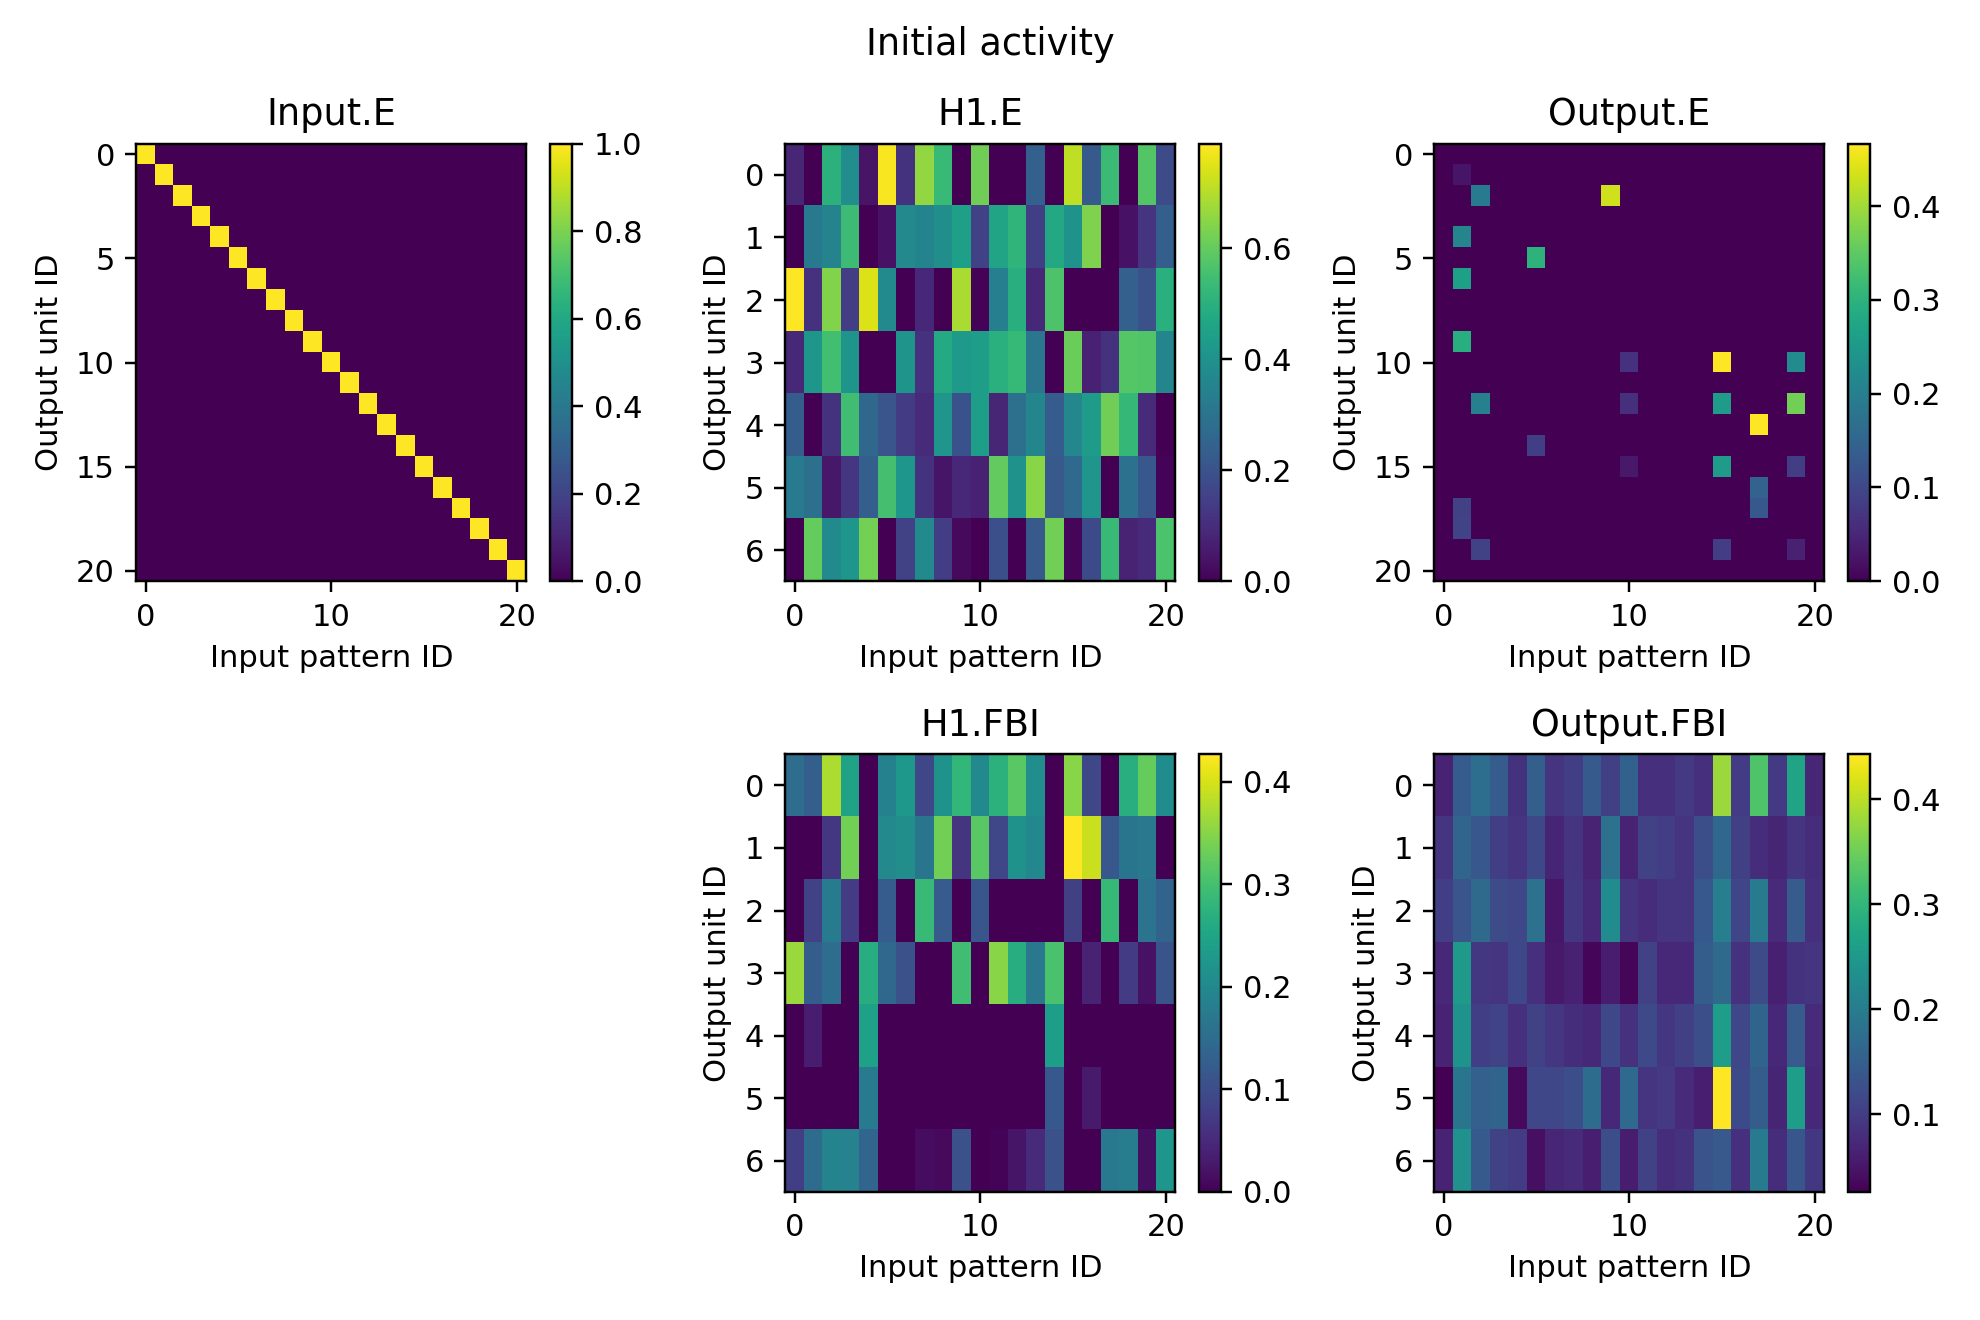

<IPython.core.display.Javascript object>


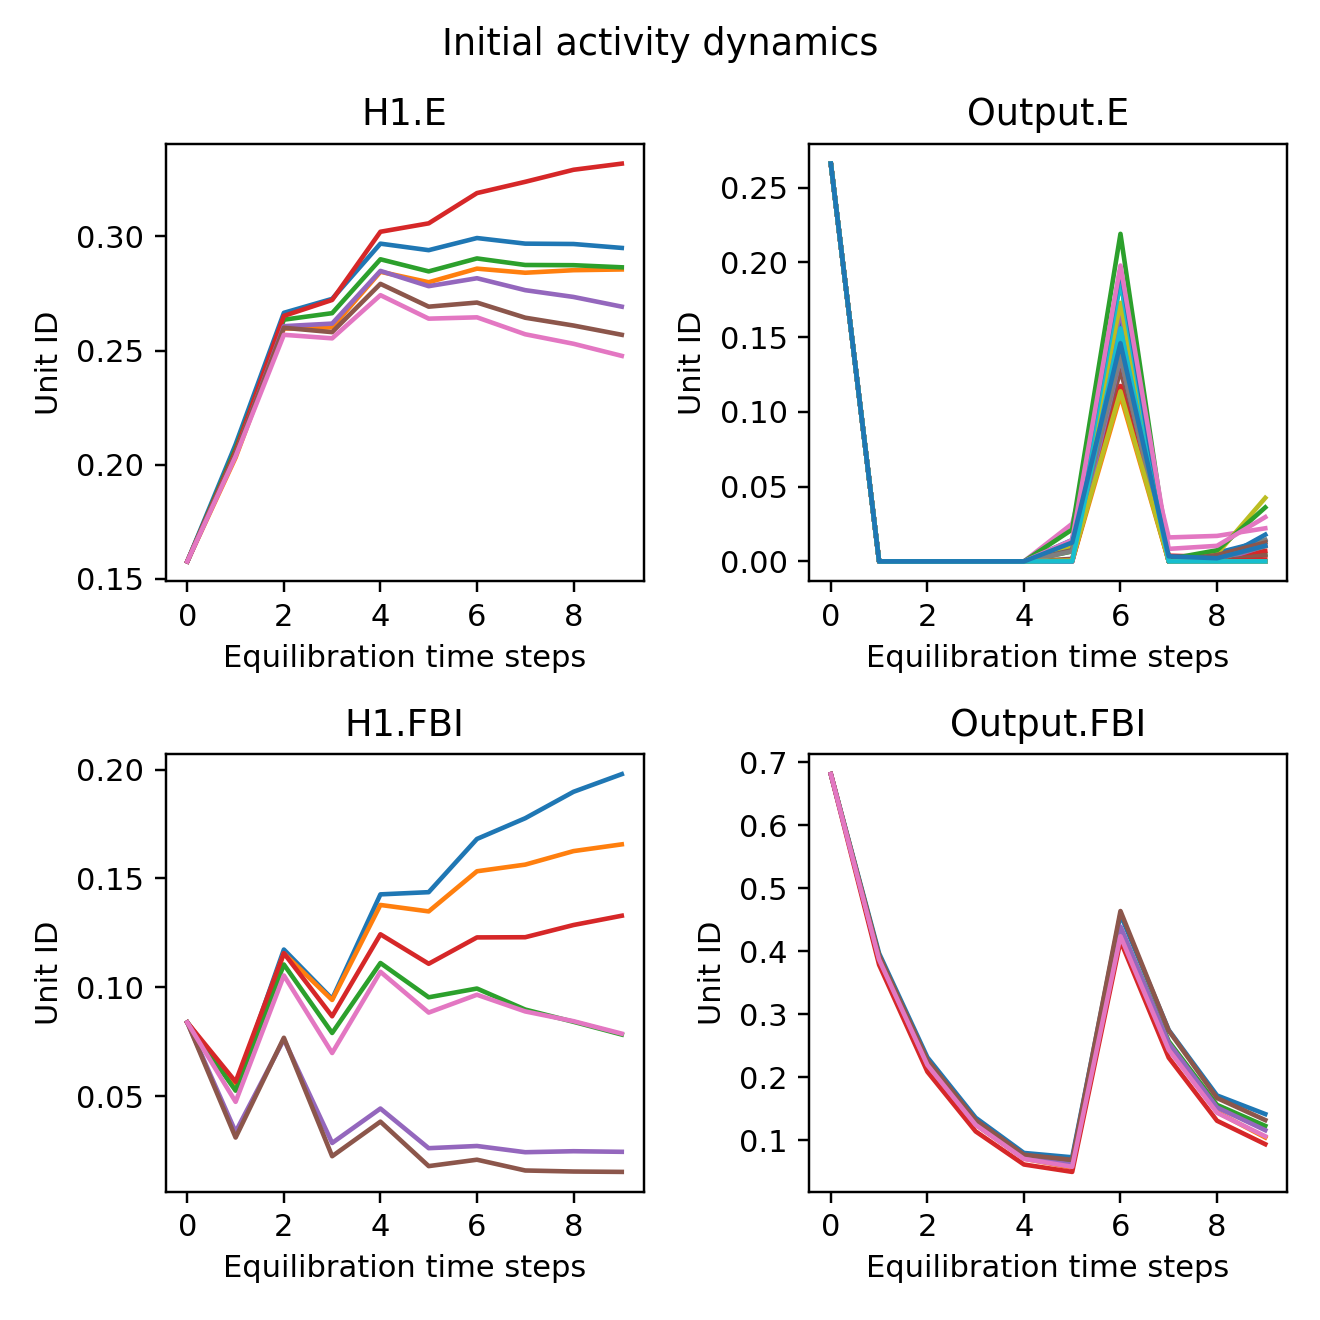

Initial population biases:
H1 E tensor([0., 0., 0., 0., 0., 0., 0.])
H1 FBI tensor([0., 0., 0., 0., 0., 0., 0.])
Output E tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])
Output FBI tensor([0., 0., 0., 0., 0., 0., 0.])


100%|██████████| 300/300 [00:15<00:00, 19.44it/s]


<IPython.core.display.Javascript object>


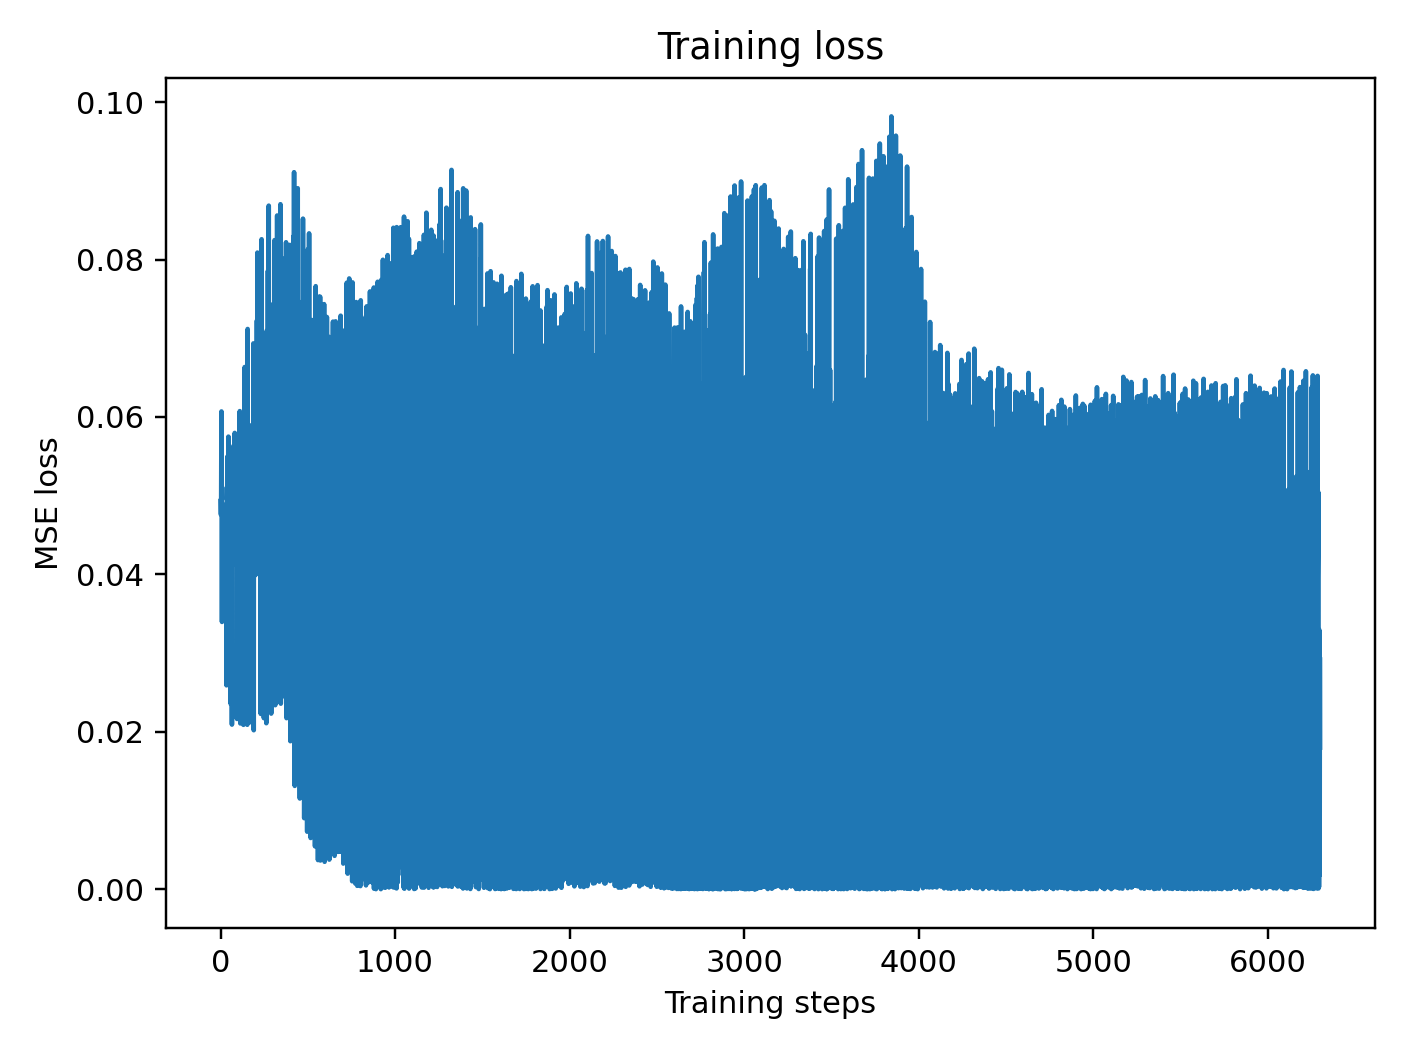

<IPython.core.display.Javascript object>


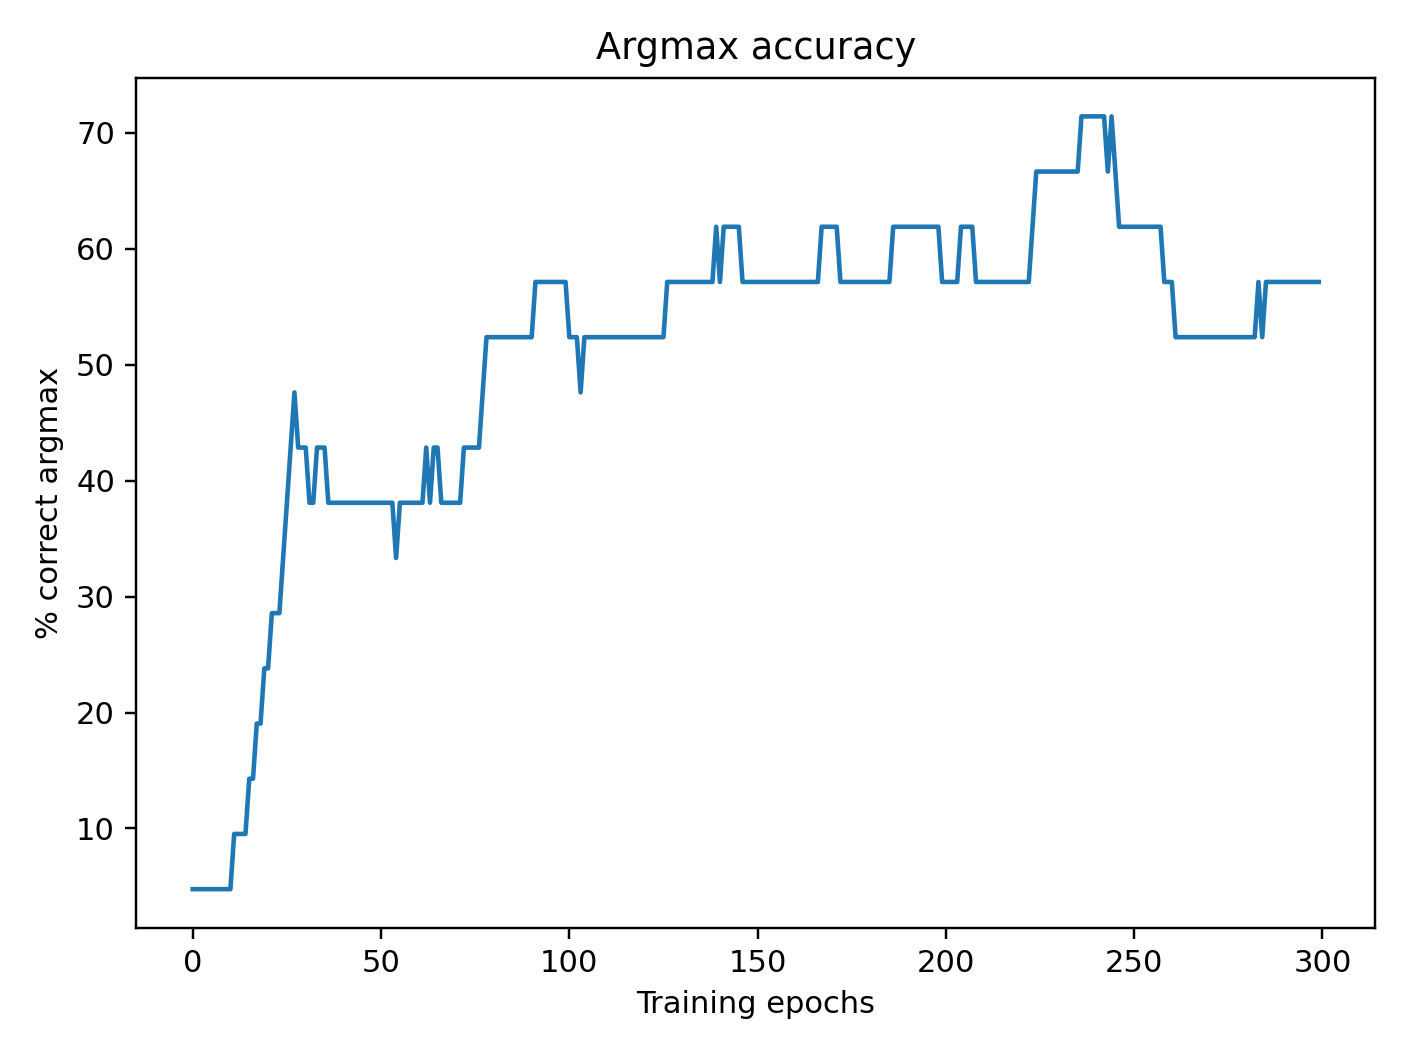

<IPython.core.display.Javascript object>


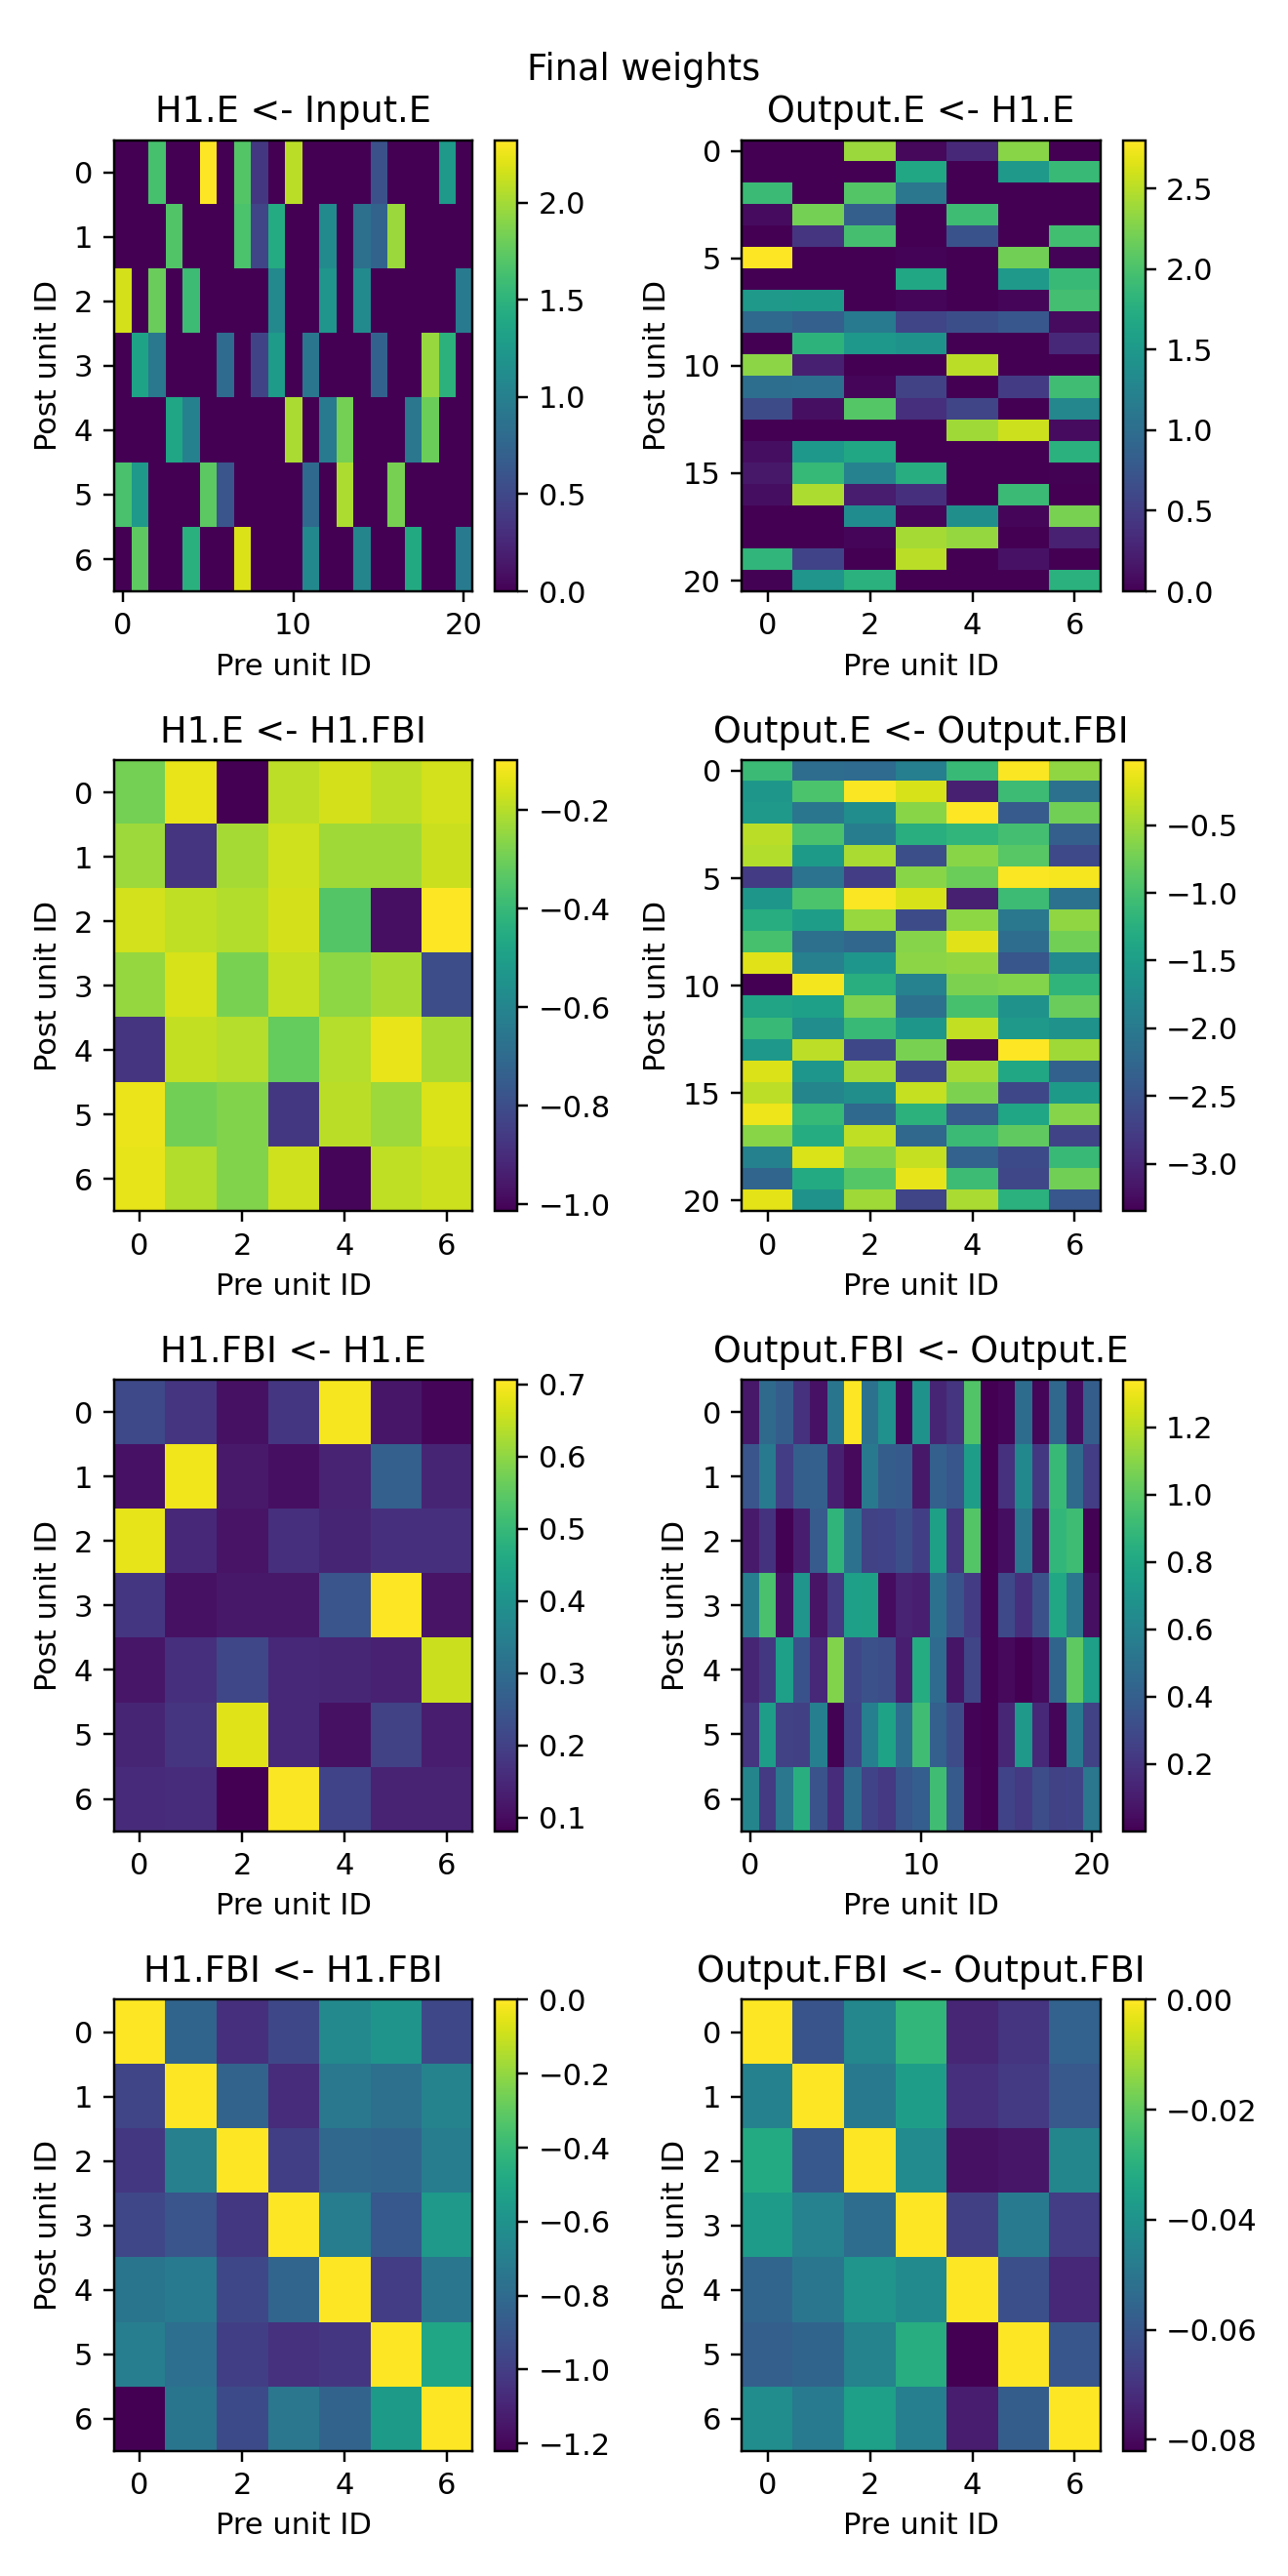

<IPython.core.display.Javascript object>


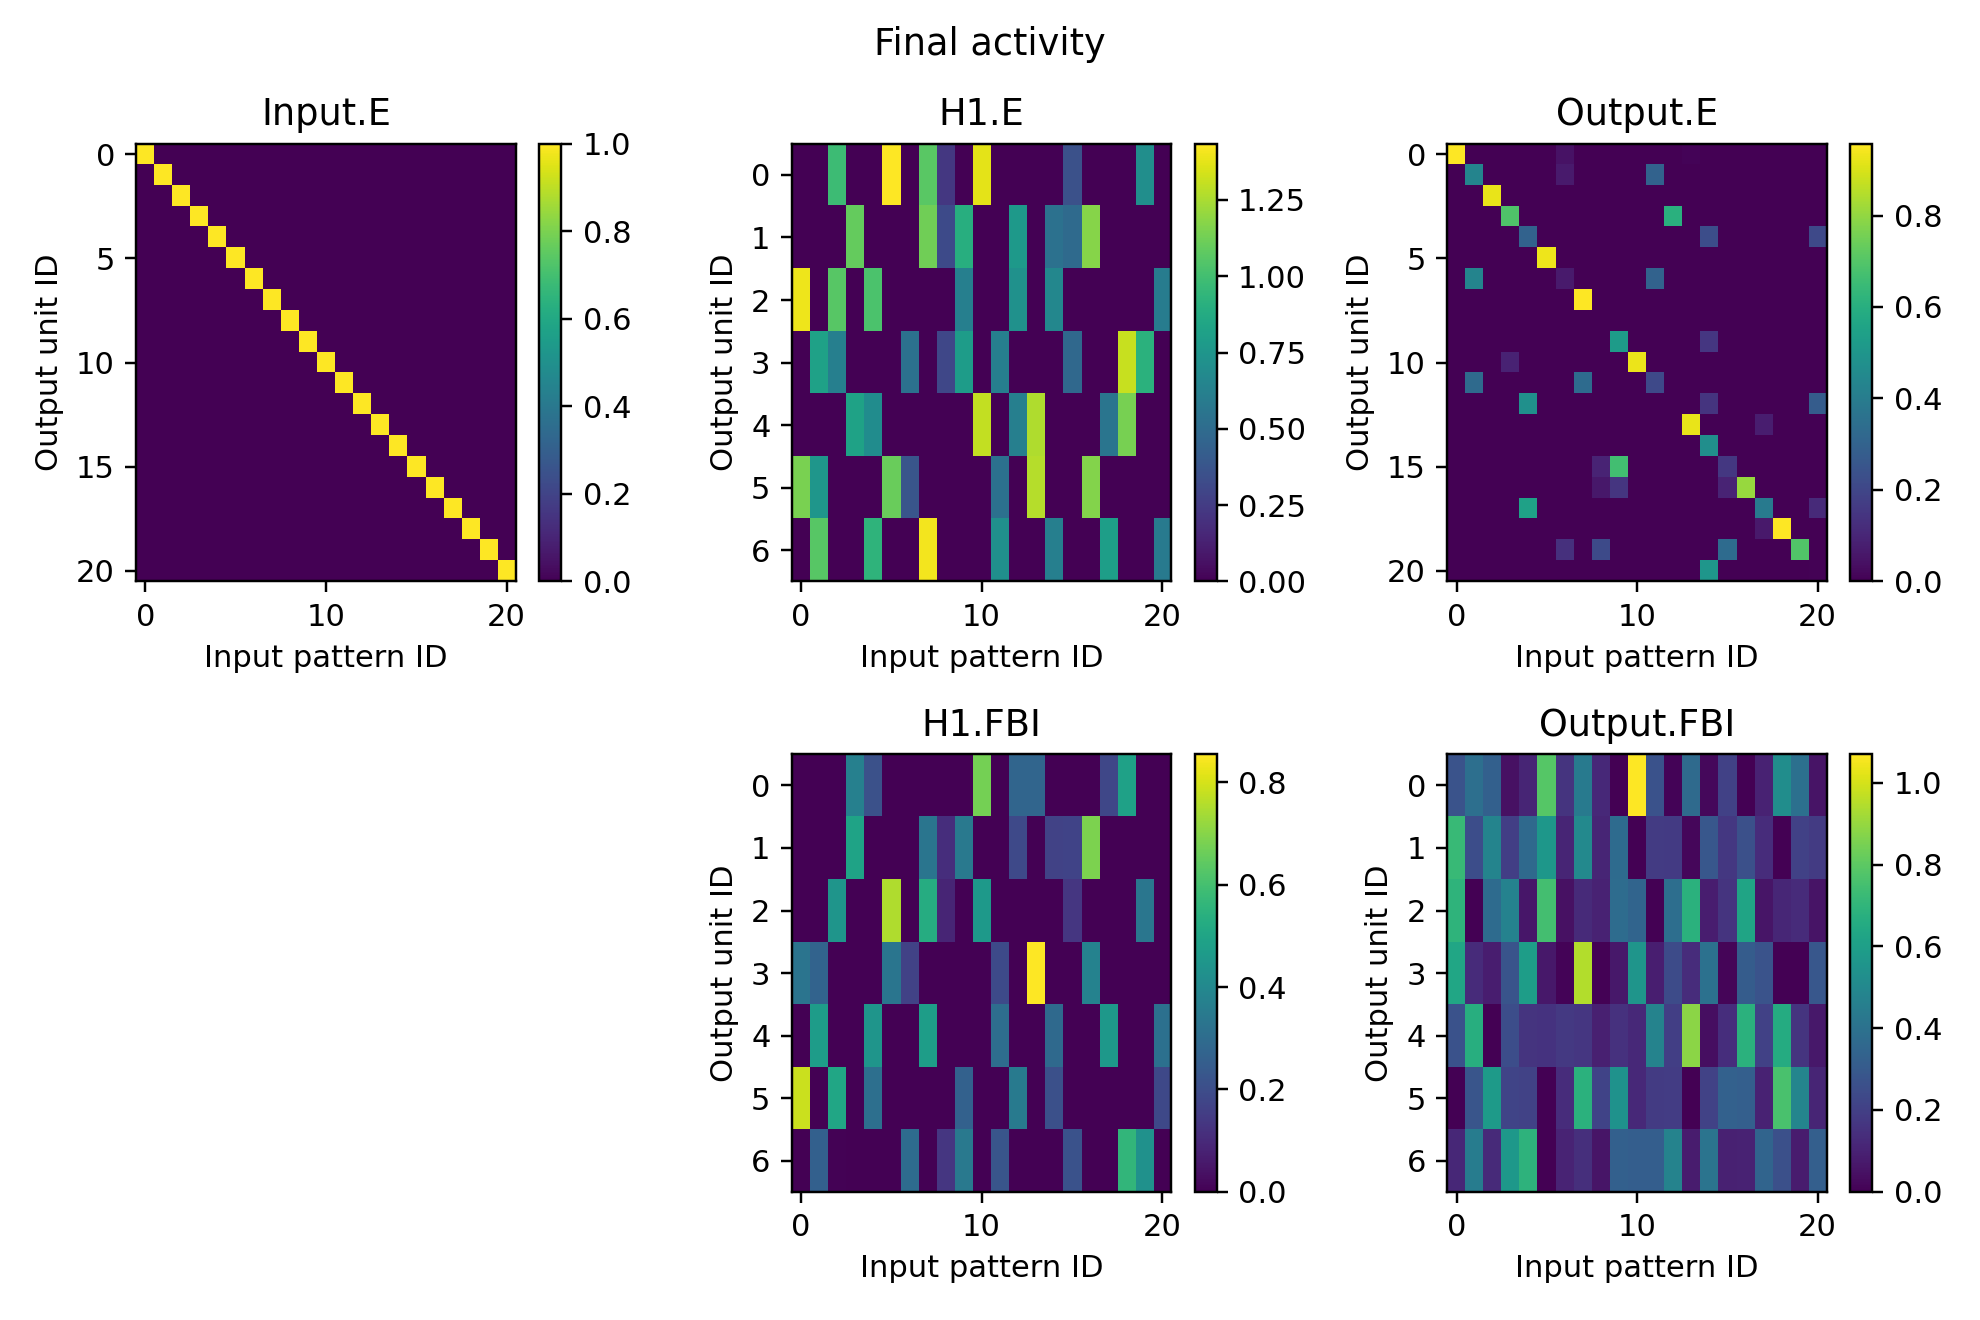

<IPython.core.display.Javascript object>


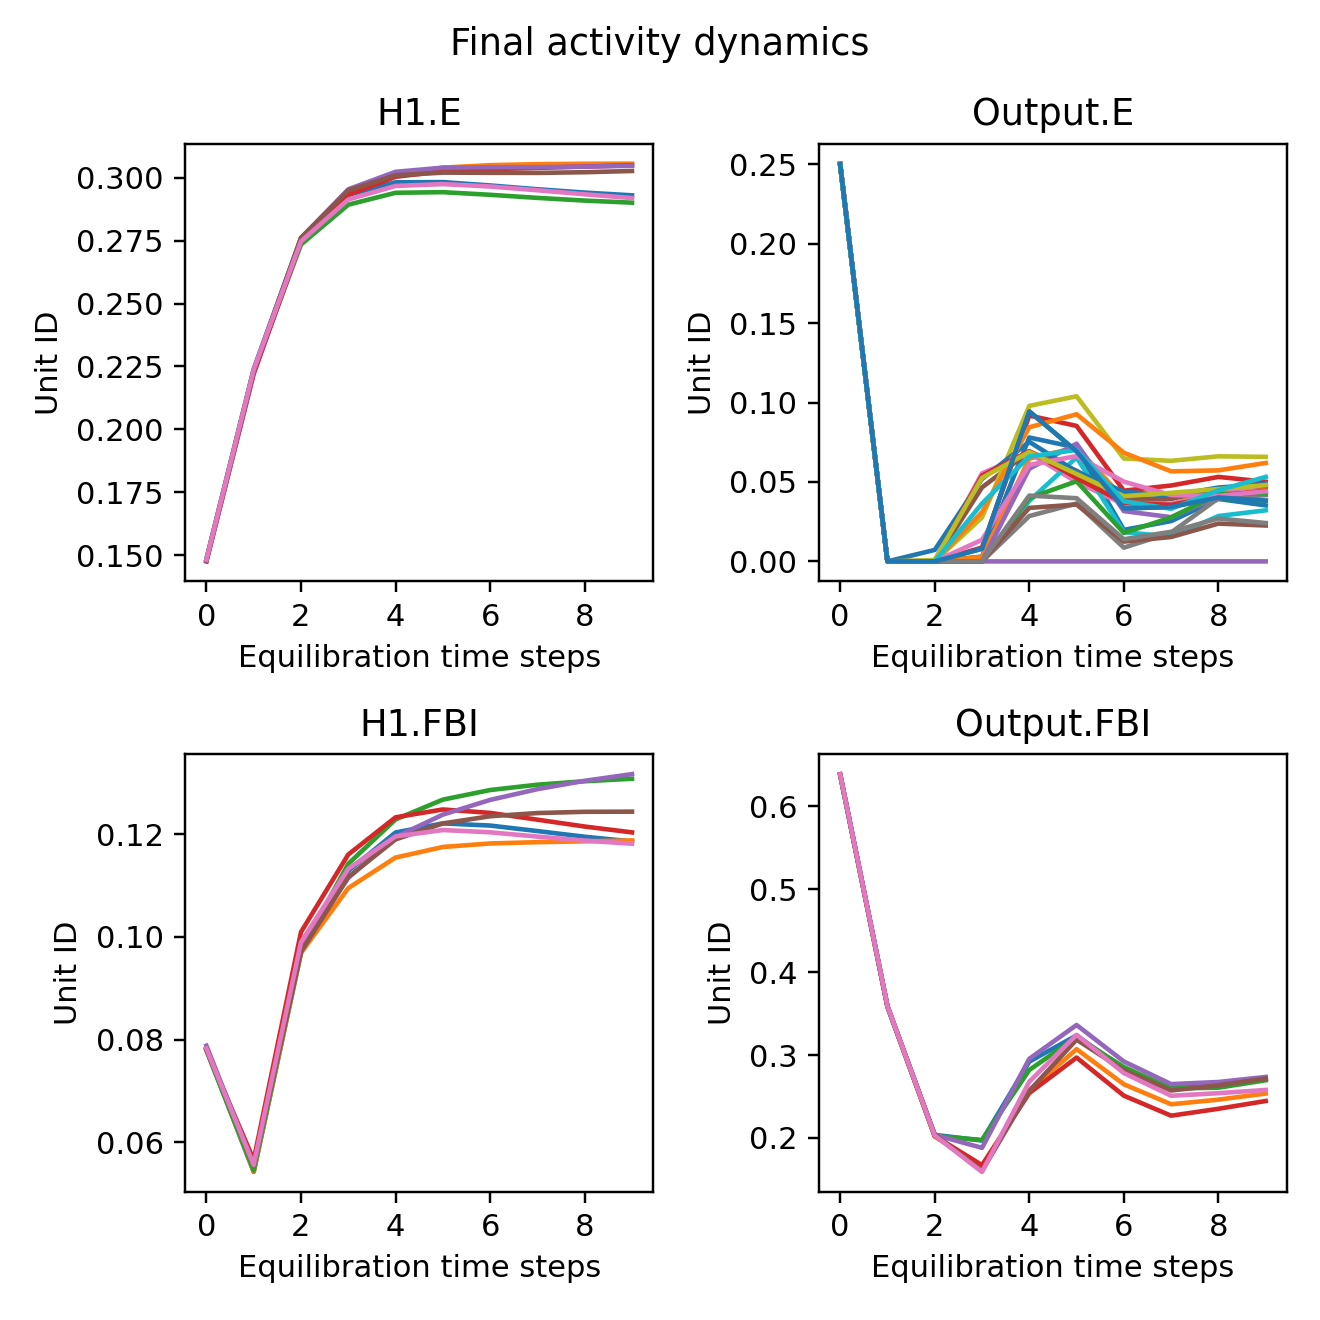

Final population biases:
H1 E tensor([0., 0., 0., 0., 0., 0., 0.])
H1 FBI tensor([0., 0., 0., 0., 0., 0., 0.])
Output E tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])
Output FBI tensor([0., 0., 0., 0., 0., 0., 0.])


In [6]:
network_config = read_from_yaml('optimize/config/EIANN_1_hidden_Gjorgieva_Hebb_config.yaml')
layer_config = network_config['layer_config']
projection_config = network_config['projection_config']
training_kwargs = network_config['training_kwargs']
network = EIANN(layer_config, projection_config, seed=seed, **training_kwargs)
test_EIANN_config(network, dataset, target, epochs, supervised=False)

Gjorgieva Hebb Norm rule w/learned inhibition (Gjorgieva Anti-Hebb Norm rule) (relu)

In [ ]:
layer_config = {'Input': 
                    {'E': 
                         {'size': 21}
                    },
                'H1': 
                    {'E': 
                       {'size': 7, 
                        'activation': 'relu'
                       },
                    'FBI': 
                        {'size': 7, 
                        'activation': 'relu'
                        }
                    },
                'Output': 
                    {'E': 
                       {'size': 21, 
                        'activation': 'relu'
                       },
                    'FBI': 
                        {'size': 7, 
                        'activation': 'relu'
                        }
                    }
                 }

projection_config = {'H1':
                         {'E': 
                              {'Input': 
                                   {'E': 
                                        {'weight_init': 'uniform_', 
                                         'weight_init_args': (0, 1), 
                                         'weight_constraint': 'normalize_weight',
                                         'weight_constraint_kwargs': 
                                             {'scale': 3.255803E+00
                                             },
                                         'weight_bounds': (0, None), 
                                         'direction': 'F', 
                                         'learning_rule': 'GjorgievaHebb',
                                         'learning_rule_kwargs': 
                                             {'sign': 1,
                                              'learning_rate': 2.756839E-01
                                             }
                                        }
                                   }, 
                               'H1': 
                                   {'FBI': 
                                        {'weight_init': 'uniform_', 
                                         'weight_init_args': (-1, 0), 
                                         'weight_constraint': 'normalize_weight',
                                         'weight_constraint_kwargs': 
                                             {'scale': 2.352644E+00
                                             },
                                         'weight_bounds': (None, -0.15), 
                                         'direction': 'R', 
                                         'learning_rule': 'GjorgievaHebb',
                                         'learning_rule_kwargs': 
                                             {'sign': 1,
                                              'learning_rate': 1.415294E-02
                                             }
                                        }
                                   }
                              },
                          'FBI': 
                              {'H1': 
                                   {'E': 
                                        {'weight_init': 'uniform_', 
                                         'weight_init_args': (0, 1), 
                                         'weight_constraint': 'normalize_weight',
                                         'weight_constraint_kwargs': 
                                             {'scale': 1.925080E+00
                                             },
                                         'weight_bounds': (0, None), 
                                         'direction': 'F', 
                                         'learning_rule': 'GjorgievaHebb',
                                         'learning_rule_kwargs': 
                                             {'sign': 1,
                                              'learning_rate': 3.213503E-01
                                             }
                                        },
                                    'FBI': 
                                        {'weight_init': 'uniform_', 
                                         'weight_init_args': (-1, 0), 
                                         'weight_constraint': 'normalize_weight',
                                         'weight_constraint_kwargs': 
                                             {'scale': 1.877143E+00
                                             },
                                         'weight_bounds': (None, -0.15), 
                                         'direction': 'R', 
                                         'learning_rule': 'GjorgievaHebb',
                                         'learning_rule_kwargs': 
                                             {'sign': 1,
                                              'learning_rate': 4.600147E-02
                                             }
                                        }
                                   }
                              }
                         },
                      'Output': 
                         {'E': 
                              {'H1': 
                                   {'E': 
                                        {'weight_init': 'uniform_', 
                                         'weight_init_args': (0, 1), 
                                         'weight_constraint': 'normalize_weight',
                                         'weight_constraint_kwargs': 
                                             {'scale': 8.436103E-01
                                             },
                                         'weight_bounds': (0, None), 
                                         'direction': 'F', 
                                         'learning_rule': 'GjorgievaHebb',
                                         'learning_rule_kwargs': 
                                             {'sign': 1,
                                              'learning_rate': 2.756839E-01
                                             }
                                        }
                                   }, 
                               'Output': 
                                   {'FBI': 
                                        {'weight_init': 'uniform_', 
                                         'weight_init_args': (-1, 0), 
                                         'weight_constraint': 'normalize_weight',
                                         'weight_constraint_kwargs': 
                                             {'scale': 1.589356E+00
                                             },
                                         'weight_bounds': (None, -0.15), 
                                         'direction': 'R', 
                                         'learning_rule': 'GjorgievaHebb',
                                         'learning_rule_kwargs': 
                                             {'sign': 1,
                                              'learning_rate': 1.415294E-02
                                             }
                                        }
                                   }
                              },
                          'FBI': 
                              {'Output': 
                                   {'E': 
                                        {'weight_init': 'uniform_', 
                                         'weight_init_args': (0, 1), 
                                         'weight_constraint': 'normalize_weight',
                                         'weight_constraint_kwargs': 
                                             {'scale': 7.526584E+00
                                             },
                                         'weight_bounds': (0, None), 
                                         'direction': 'F', 
                                         'learning_rule': 'GjorgievaHebb',
                                         'learning_rule_kwargs': 
                                             {'sign': 1,
                                              'learning_rate': 3.213503E-01
                                             }
                                        },
                                    'FBI': 
                                        {'weight_init': 'uniform_', 
                                         'weight_init_args': (-1, 0), 
                                         'weight_constraint': 'normalize_weight',
                                         'weight_constraint_kwargs': 
                                             {'scale': 1.979838E+00
                                             },
                                         'weight_bounds': (None, -0.15), 
                                         'direction': 'R', 
                                         'learning_rule': 'GjorgievaHebb',
                                         'learning_rule_kwargs': 
                                             {'sign': 1,
                                              'learning_rate': 4.600147E-02
                                             }
                                        }
                                   }
                              }
                         }
                    }

training_kwargs = \
    {'tau': 3,
     'forward_steps': 10,
     'backward_steps': 0,
     'learning_rate': 9.553728E-01
    }

network = EIANN(layer_config, projection_config, seed=seed, **training_kwargs)
test_EIANN_config(network, dataset, target, epochs, supervised=False)

BTSP rule w/static somatic and dendritic inhibition (relu)

In [ ]:
layer_config = {'Input': 
                    {'E': 
                         {'size': 21}
                    },
                'H1': 
                    {'E': 
                       {'size': 7, 
                        'activation': 'relu'
                       },
                    'FBI': 
                        {'size': 1, 
                        'activation': 'relu'
                        }, 
                    'Dend_I': 
                        {'size': 1, 
                         'activation': 'relu'   
                        }
                    },
                'Output': 
                    {'E': 
                       {'size': 21, 
                        'activation': 'relu'
                       },
                    'FBI': 
                        {'size': 1, 
                        'activation': 'relu'
                        }
                    }
                 }

projection_config = {'H1':
                         {'E': 
                              {'Input': 
                                   {'E': 
                                        {'weight_init': 'uniform_', 
                                         'weight_init_args': (0, 0.008254150222314285), 
                                         'weight_bounds': (0, 1.673418E+00), 
                                         'direction': 'F', 
                                         'learning_rule': 'BTSP',
                                         'learning_rule_kwargs': 
                                             {'pos_loss_th': 1.150415E-01,
                                              'neg_loss_th': -2.575194E-01,
                                              'learning_rate': 1.917011E-02
                                             }
                                        }
                                   }, 
                               'H1': 
                                   {'FBI': 
                                        {'weight_init': 'fill_', 
                                         'weight_init_args': (-1.050965E-01,), 
                                         'direction': 'R', 
                                         'learning_rule': None
                                        },
                                    'Dend_I': 
                                        {'weight_init': 'fill_',
                                         'weight_init_args': (-1.381812E-01,),
                                         'direction': 'B', 
                                         'compartment': 'dend',
                                         'learning_rule': None
                                        }
                                   },
                               'Output': 
                                   {'E': 
                                        {'weight_init': 'uniform_',
                                         'weight_init_args': (0.1457811929221238, 0.30437337146038096),
                                         'weight_bounds': (0, 3.892418E+00),
                                         'direction': 'B',
                                         'compartment': 'dend',
                                         'learning_rule': 'BTSP'     
                                        }   
                                   }
                              },
                          'FBI': 
                              {'H1': 
                                   {'E': 
                                        {'weight_init': 'fill_', 
                                         'weight_init_args': (1,), 
                                         'direction': 'F', 
                                         'learning_rule': None
                                        }
                                   }
                              },
                          'Dend_I': 
                              {'H1': 
                                   {'E':
                                        {'weight_init': 'fill_', 
                                         'weight_init_args': (1,), 
                                         'direction': 'B', 
                                         'learning_rule': None
                                        }
                                   }
                              }
                         },
                      'Output': 
                         {'E': 
                              {'H1': 
                                   {'E': 
                                        {'weight_init': 'uniform_', 
                                         'weight_init_args': (0, 0.05570480798869999), 
                                         'weight_bounds': (0, 3.764467E+00), 
                                         'direction': 'F', 
                                         'learning_rule': 'BTSP',
                                         'learning_rule_kwargs': 
                                             {'pos_loss_th': 2.826361E-01,
                                              'neg_loss_th': -9.615551E-02,
                                              'learning_rate': 1.626812E-02
                                             }
                                        }
                                   }, 
                               'Output': 
                                   {'FBI': 
                                        {'weight_init': 'fill_', 
                                         'weight_init_args': (-1.999833E+00,), 
                                         'direction': 'R', 
                                         'learning_rule': None
                                        }
                                   }
                              },
                          'FBI': 
                              {'Output': 
                                   {'E': 
                                        {'weight_init': 'fill_', 
                                         'weight_init_args': (1,), 
                                         'direction': 'F', 
                                         'learning_rule': None
                                        }
                                   }
                              }
                         }
                    }

training_kwargs = \
    {'tau': 3,
     'forward_steps': 10,
     'backward_steps': 0,
     'learning_rate': 9.553728E-01
    }

network = EIANN(layer_config, projection_config, seed=seed, **training_kwargs)
test_EIANN_config(network, dataset, target, epochs)

BTSP rule w/static somatic inhibition and learned dendritic inhibition (relu)

In [ ]:
layer_config = {'Input': 
                    {'E': 
                         {'size': 21}
                    },
                'H1': 
                    {'E': 
                       {'size': 7, 
                        'activation': 'relu'
                       },
                    'FBI': 
                        {'size': 1, 
                        'activation': 'relu'
                        }, 
                    'Dend_I': 
                        {'size': 1, 
                         'activation': 'relu'   
                        }
                    },
                'Output': 
                    {'E': 
                       {'size': 21, 
                        'activation': 'relu'
                       },
                    'FBI': 
                        {'size': 1, 
                        'activation': 'relu'
                        }
                    }
                 }

projection_config = {'H1':
                         {'E': 
                              {'Input': 
                                   {'E': 
                                        {'weight_init': 'uniform_', 
                                         'weight_init_args': (0, 0.008254150222314285), 
                                         'weight_bounds': (0, 1.673418E+00), 
                                         'direction': 'F', 
                                         'learning_rule': 'BTSP',
                                         'learning_rule_kwargs': 
                                             {'pos_loss_th': 1.150415E-01,
                                              'neg_loss_th': -2.575194E-01,
                                              'learning_rate': 1.917011E-02
                                             }
                                        }
                                   }, 
                               'H1': 
                                   {'FBI': 
                                        {'weight_init': 'fill_', 
                                         'weight_init_args': (-1.050965E-01,), 
                                         'direction': 'R', 
                                         'learning_rule': None
                                        },
                                    'Dend_I': 
                                        {'weight_init': 'fill_',
                                         'weight_init_args': (-1.381812E-01,),
                                         'weight_bounds': (None, 0),
                                         'direction': 'B', 
                                         'compartment': 'dend',
                                         'learning_rule': 'DendriticLoss',
                                         'learning_rule_kwargs': 
                                             {'sign': -1,
                                              'learning_rate': 1.626812E-02
                                             }
                                        }
                                   },
                               'Output': 
                                   {'E': 
                                        {'weight_init': 'uniform_',
                                         'weight_init_args': (0.1457811929221238, 0.30437337146038096),
                                         'weight_bounds': (0, 3.892418E+00),
                                         'direction': 'B',
                                         'compartment': 'dend',
                                         'learning_rule': 'BTSP'     
                                        }   
                                   }
                              },
                          'FBI': 
                              {'H1': 
                                   {'E': 
                                        {'weight_init': 'fill_', 
                                         'weight_init_args': (1,), 
                                         'direction': 'F', 
                                         'learning_rule': None
                                        }
                                   }
                              },
                          'Dend_I': 
                              {'H1': 
                                   {'E':
                                        {'weight_init': 'fill_', 
                                         'weight_init_args': (1,), 
                                         'direction': 'B', 
                                         'learning_rule': None
                                        }
                                   }
                              }
                         },
                      'Output': 
                         {'E': 
                              {'H1': 
                                   {'E': 
                                        {'weight_init': 'uniform_', 
                                         'weight_init_args': (0, 0.05570480798869999), 
                                         'weight_bounds': (0, 3.764467E+00), 
                                         'direction': 'F', 
                                         'learning_rule': 'BTSP',
                                         'learning_rule_kwargs': 
                                             {'pos_loss_th': 2.826361E-01,
                                              'neg_loss_th': -9.615551E-02,
                                              'learning_rate': 1.626812E-02
                                             }
                                        }
                                   }, 
                               'Output': 
                                   {'FBI': 
                                        {'weight_init': 'fill_', 
                                         'weight_init_args': (-1.999833E+00,), 
                                         'direction': 'R', 
                                         'learning_rule': None
                                        }
                                   }
                              },
                          'FBI': 
                              {'Output': 
                                   {'E': 
                                        {'weight_init': 'fill_', 
                                         'weight_init_args': (1,), 
                                         'direction': 'F', 
                                         'learning_rule': None
                                        }
                                   }
                              }
                         }
                    }

training_kwargs = {'tau': 3, 
                   'forward_steps': 10,
                   'backward_steps': 0,
                   'learning_rate': 9.553728E-01
                  }

network = EIANN(layer_config, projection_config, seed=seed, **training_kwargs)
test_EIANN_config(network, dataset, target, epochs)

In [ ]:
network_config = read_from_yaml('optimize/data/20200830_EIANN_1_hidden_BTSP_config.yaml')
layer_config = network_config['layer_config']
projection_config = network_config['projection_config']
training_kwargs = network_config['training_kwargs']
network = EIANN(layer_config, projection_config, seed=seed, **training_kwargs)
test_EIANN_config(network, dataset, target, epochs)